# Confusion Matrix Analysis
This notebook is to recompute the accuracy of Exp #32-37 (GluonCV ImageNet scripts) using the same method as other Jupyter notebooks.

- Models
 - #29 (Jupyter notebook) for verification
 - #33-37 (GluonCV script)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install gluoncv

     |████████████████████████████████| 810 kB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [3]:
#import sys
#sys.path.append('~/SageMaker/AmazonSageMaker-defect-classifier-poca/models')

In [4]:
import os
import random
import numpy as np
import pandas as pd

import PIL
from PIL import ImageDraw

In [5]:
import mxnet as mx
from mxnet import gluon, image, init, nd
from mxnet.gluon.data.vision import transforms


In [6]:
from analysis_confusion_matrix_utils import get_loaded_model, draw_confusion_matrix, create_confusion_matrix

In [7]:
num_gpus = mx.context.num_gpus()
ctx = [mx.gpu(i) for i in range(num_gpus)] if num_gpus > 0 else [mx.cpu()]

In [8]:
num_workers = 8 * num_gpus
per_device_batch_size = 96
batch_size = per_device_batch_size * max(num_gpus, 1)

In [9]:
transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

## Definitions

In [10]:
root = '/home/ec2-user/SageMaker'
git_dir = 'AmazonSageMaker-defect-classifier-poca'
model_dir = 'models/patch_classification'

In [11]:
dict_exp = {29: {'version': '3', 'camera_type': 'GA'},
            32: {'version': '3', 'camera_type': 'GI'},
            33: {'version': '3', 'camera_type': 'GA'},
            34: {'version': '2', 'camera_type': 'GI'},
            35: {'version': '2', 'camera_type': 'GA'},
            36: {'version': '3', 'camera_type': 'GI'},
            37: {'version': '3', 'camera_type': 'GA'}
}

In [12]:
net_names = {
    29: 'ResNet18_v2',
    32: 'ResNet18_v1',
    33: 'ResNet18_v1',   
    34: 'ResNet18_v1',
    35: 'ResNet18_v1',   
    36: 'ResNet18_v1',
    37: 'ResNet18_v1'   
}

In [13]:
model_names = {
    29: 'ResNet18_v2-GA-dataset_v3-29-0828-132222.params',
    32: 'ResNet18_v1-GI-dataset_v3-32.params',
    33: 'ResNet18_v1-GA-dataset_v3-33.params',  
    34: 'ResNet18_v1-GI-dataset_v2-34.params',
    35: 'ResNet18_v1-GA-dataset_v2-35.params',  
    36: 'ResNet18_v1-GI-dataset_v3-36.params',
    37: 'ResNet18_v1-GA-dataset_v3-37.params'  
}

In [14]:
dict_classes = {'2': {'GA': 32, 'GI': 15},
                '3': {'GA': 22, 'GI': 13}
}

In [15]:
data_dirs = {'2': 'datasets-patches-balanced',
            '3': 'dataset_v3/datasets-patches-balanced_v3'
}

# Exp. #29
## GA, dataset v3, resnet18_v2, Jupyter notebook

In [16]:
exp_id = 29

In [17]:
version = dict_exp[exp_id]['version']
camera_type = dict_exp[exp_id]['camera_type']

In [18]:
data_dir = data_dirs[version]
data_fdir = f'{root}/{data_dir}/{camera_type}'

In [19]:
classes = dict_classes[version][camera_type]
model_name = model_names[exp_id]
models_fname = f'{root}/{git_dir}/{model_dir}/{model_name}'

In [20]:
train_ds, valid_ds, test_ds = [
        gluon.data.vision.ImageFolderDataset(
            os.path.join(data_fdir, folder))
        for folder in ['train', 'val', 'test']
    ]
labels = train_ds.synsets
val_data = gluon.data.DataLoader(
    valid_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)
test_data = gluon.data.DataLoader(
    test_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:318: UserWarning: Ignoring /home/ec2-user/SageMaker/dataset_v3/datasets-patches-balanced_v3/GA/train/H1/.ipynb_checkpoints of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:318: UserWarning: Ignoring /home/ec2-user/SageMaker/dataset_v3/datasets-patches-balanced_v3/GA/train/Q4/.ipynb_checkpoints of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:318: UserWarning: Ignoring /home/ec2-user/SageMaker/dataset_v3/datasets-patches-balanced_v3/GA/val/Q4/.ipynb_checkpoints of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


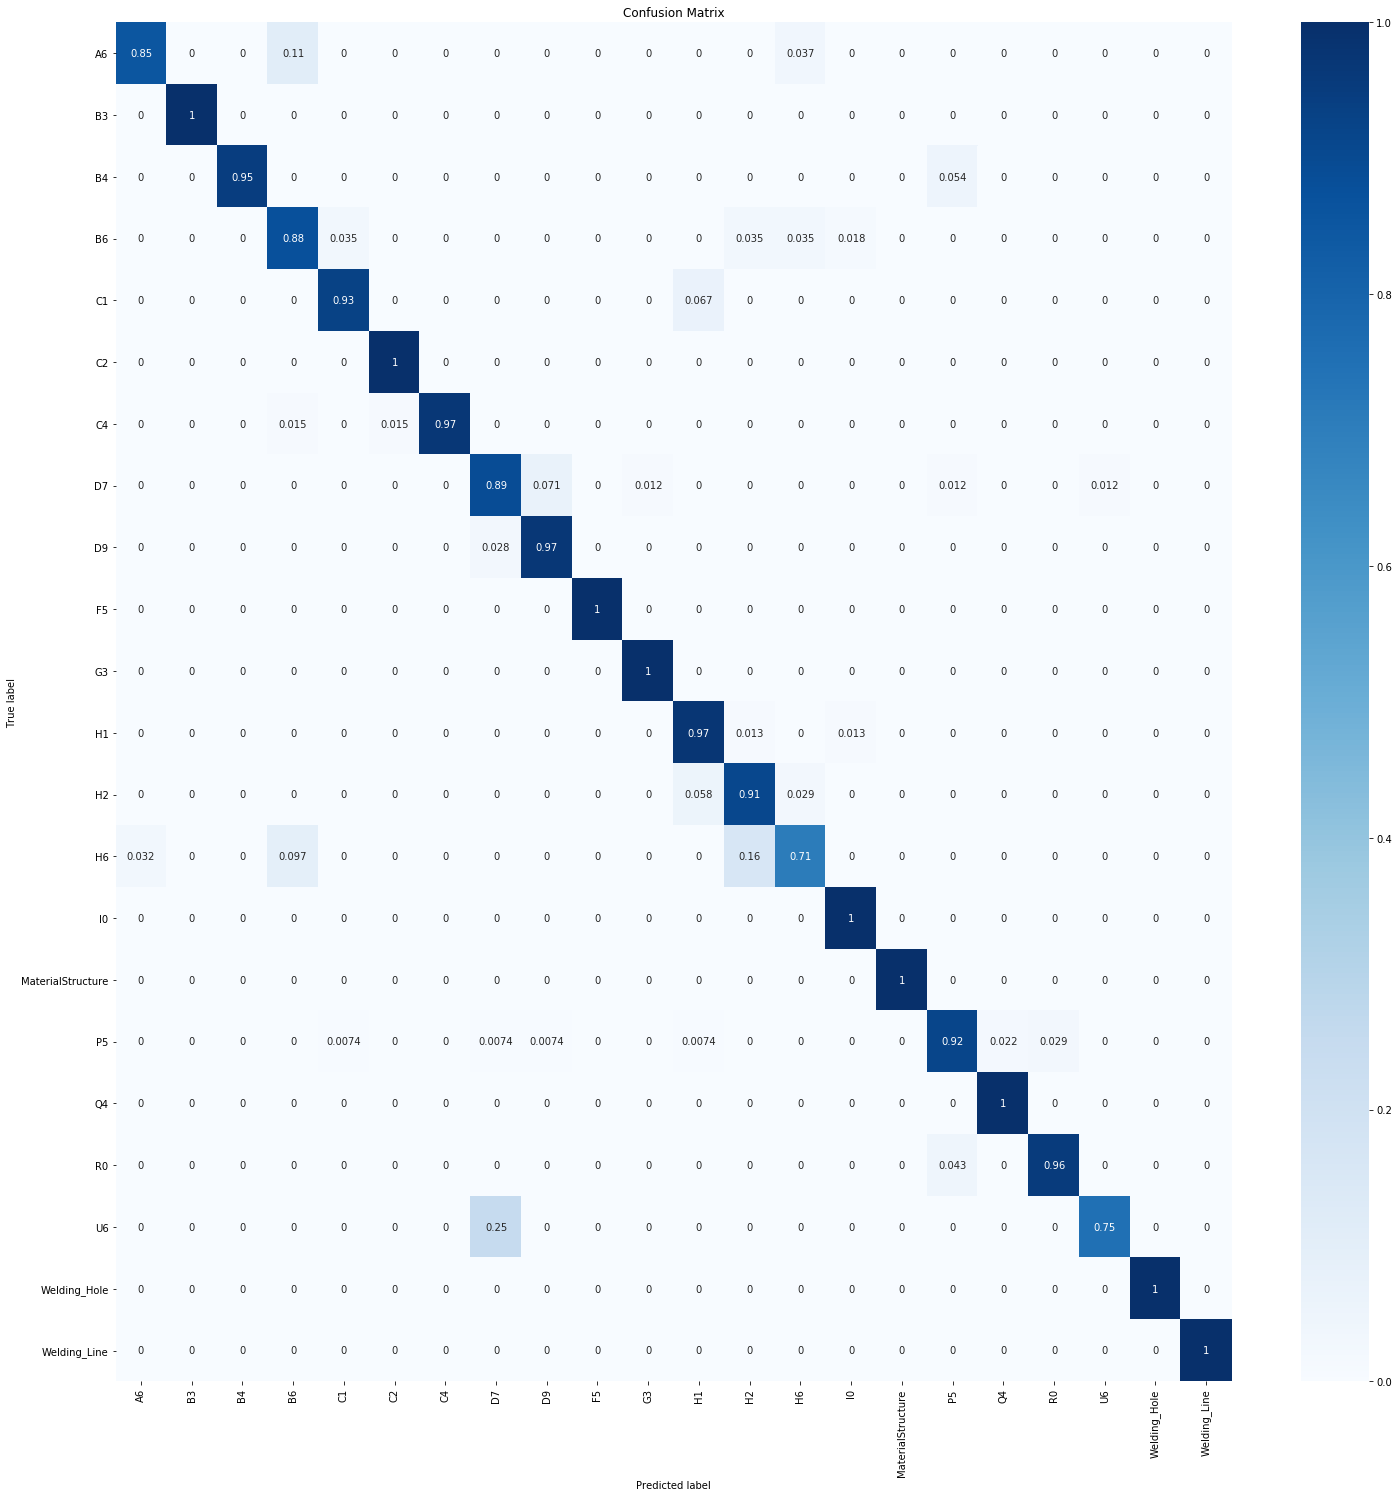

Classification Report: 
               precision    recall  f1-score   support

           0      0.958     0.852     0.902        27
           1      1.000     1.000     1.000        31
           2      1.000     0.946     0.972        37
           3      0.877     0.877     0.877        57
           4      0.824     0.933     0.875        15
           5      0.750     1.000     0.857         3
           6      1.000     0.969     0.984        65
           7      0.962     0.893     0.926        84
           8      0.833     0.972     0.897        36
           9      1.000     1.000     1.000        10
          10      0.800     1.000     0.889         4
          11      0.925     0.974     0.949        76
          12      0.887     0.913     0.900        69
          13      0.815     0.710     0.759        31
          14      0.667     1.000     0.800         4
          15      1.000     1.000     1.000        72
          16      0.969     0.919     0.943       136
  

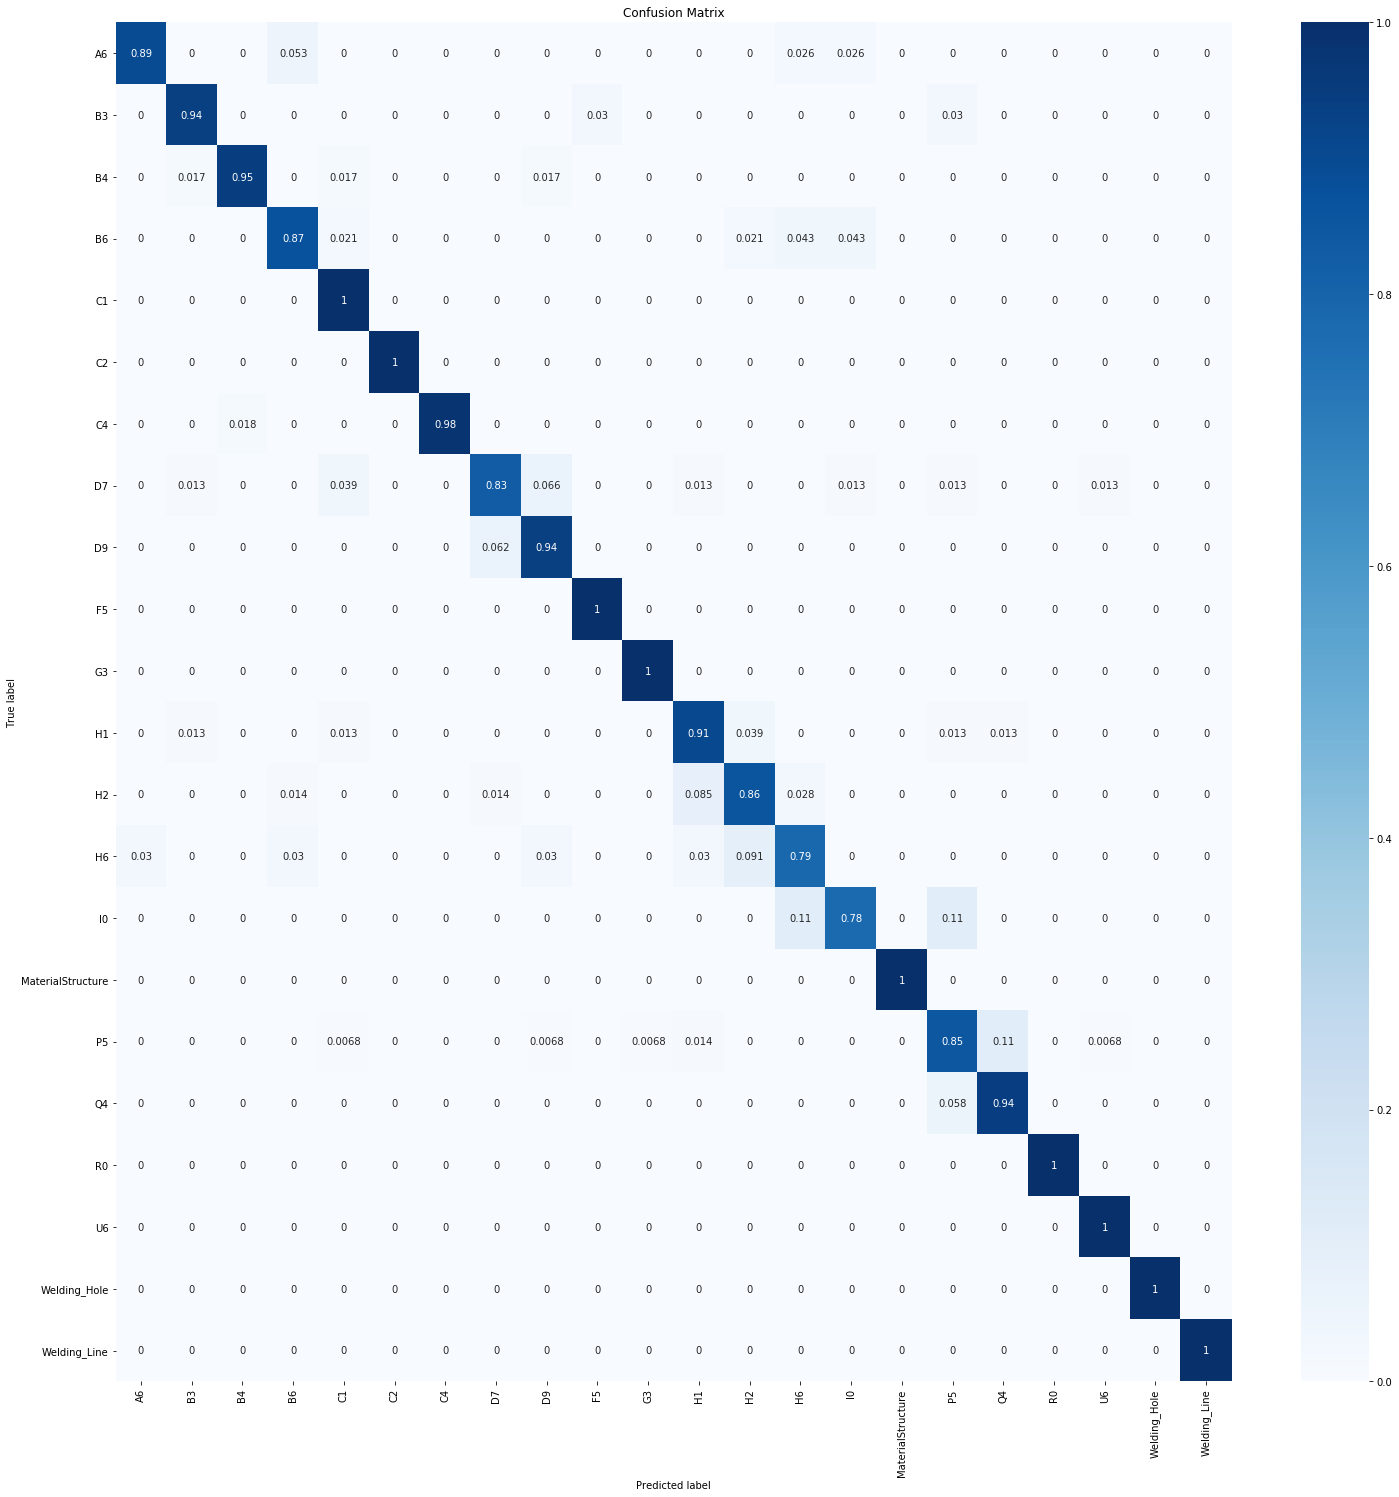

Classification Report: 
               precision    recall  f1-score   support

           0      0.971     0.895     0.932        38
           1      0.912     0.939     0.925        33
           2      0.982     0.948     0.965        58
           3      0.911     0.872     0.891        47
           4      0.611     1.000     0.759        11
           5      1.000     1.000     1.000         4
           6      1.000     0.982     0.991        55
           7      0.955     0.829     0.887        76
           8      0.789     0.938     0.857        32
           9      0.667     1.000     0.800         2
          10      0.667     1.000     0.800         2
          11      0.873     0.908     0.890        76
          12      0.897     0.859     0.878        71
          13      0.812     0.788     0.800        33
          14      0.636     0.778     0.700         9
          15      1.000     1.000     1.000        58
          16      0.947     0.849     0.895       146
  

In [21]:
net = get_loaded_model(models_fname, net_names[exp_id], classes, ctx=ctx)
create_confusion_matrix(net=net, ctx=ctx, val_data=val_data, labels=labels)
create_confusion_matrix(net=net, ctx=ctx, val_data=test_data, labels=labels)

# Exp. #32
## GI, dataset v3, resnet18_v1, GluonCV script

In [22]:
exp_id = 32

In [23]:
version = dict_exp[exp_id]['version']
camera_type = dict_exp[exp_id]['camera_type']

In [24]:
data_dir = data_dirs[version]
data_fdir = f'{root}/{data_dir}/{camera_type}'

In [25]:
classes = dict_classes[version][camera_type]
model_name = model_names[exp_id]
models_fname = f'{root}/{git_dir}/{model_dir}/{model_name}'

In [26]:
train_ds, valid_ds, test_ds = [
        gluon.data.vision.ImageFolderDataset(
            os.path.join(data_fdir, folder))
        for folder in ['train', 'val', 'test']
    ]
labels = train_ds.synsets
val_data = gluon.data.DataLoader(
    valid_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)
test_data = gluon.data.DataLoader(
    test_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)

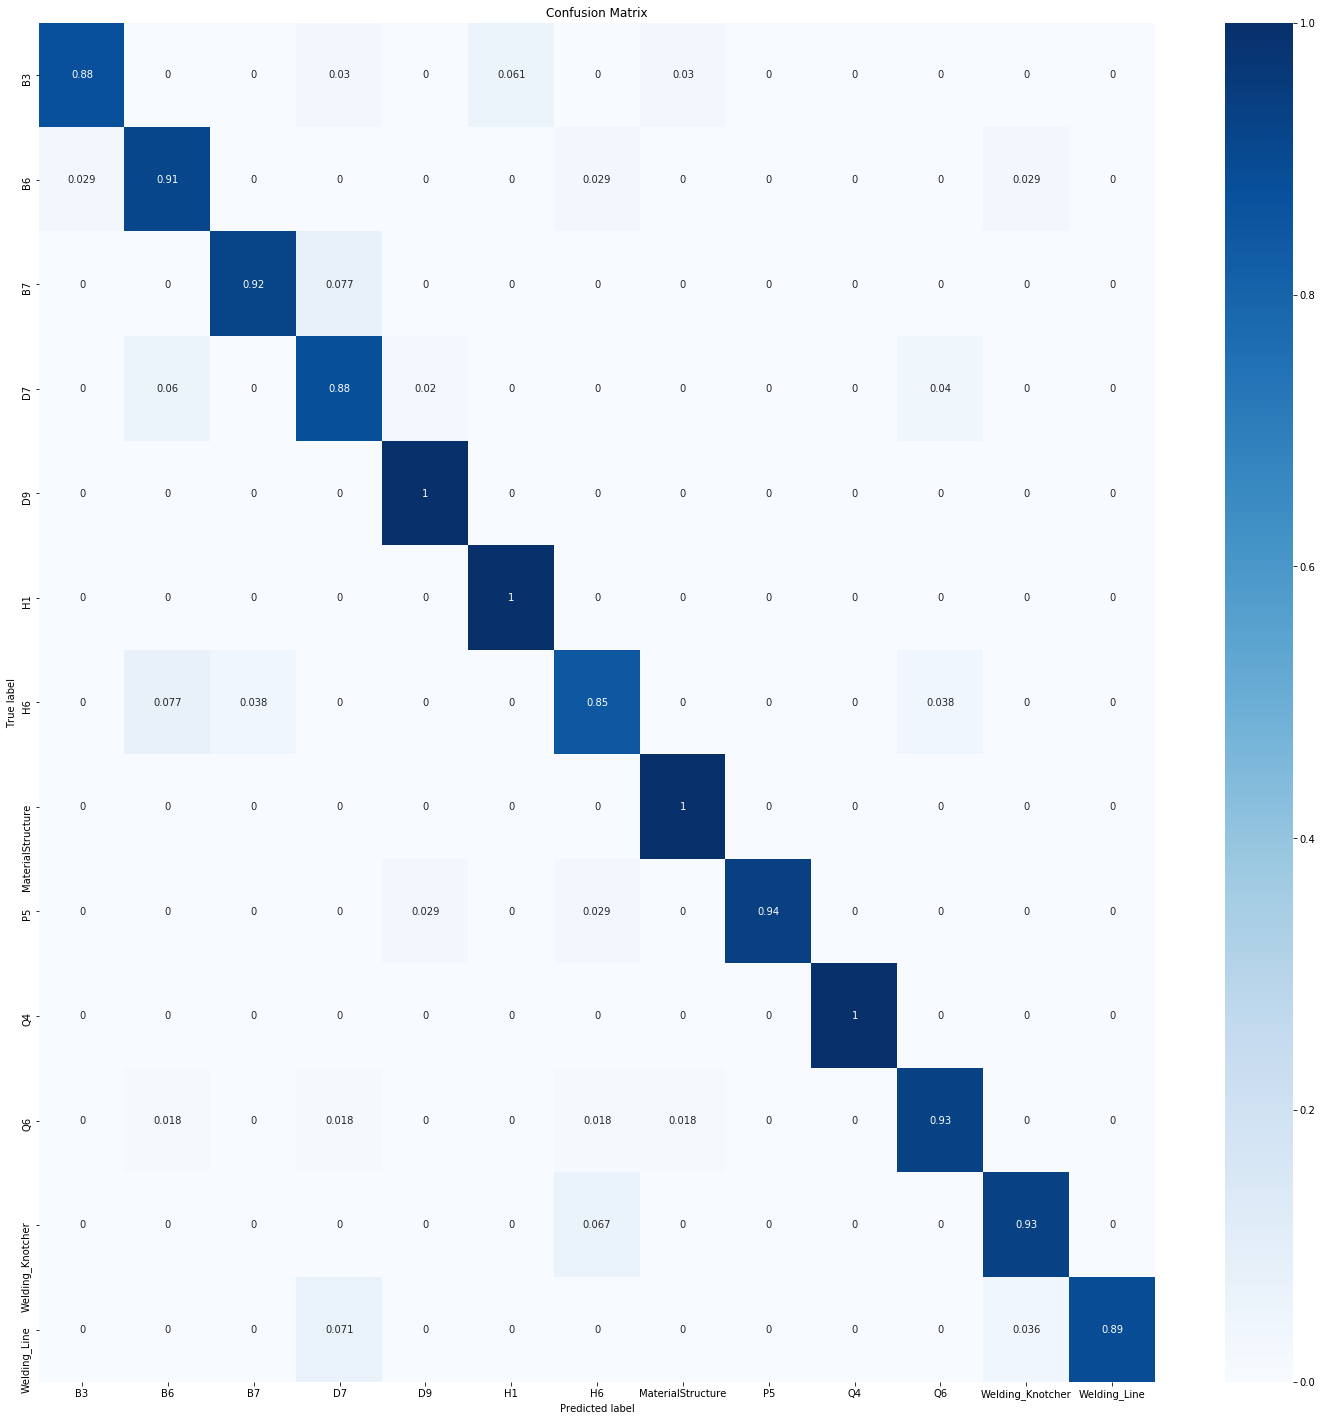

Classification Report: 
               precision    recall  f1-score   support

           0      0.967     0.879     0.921        33
           1      0.842     0.914     0.877        35
           2      0.923     0.923     0.923        13
           3      0.898     0.880     0.889        50
           4      0.926     1.000     0.962        25
           5      0.964     1.000     0.982        54
           6      0.846     0.846     0.846        26
           7      0.939     1.000     0.969        31
           8      1.000     0.941     0.970        34
           9      1.000     1.000     1.000        49
          10      0.946     0.930     0.938        57
          11      0.875     0.933     0.903        15
          12      1.000     0.893     0.943        28

    accuracy                          0.938       450
   macro avg      0.933     0.934     0.932       450
weighted avg      0.939     0.938     0.938       450

y_test: [(0, 33), (1, 35), (2, 13), (3, 50), (4, 25), 

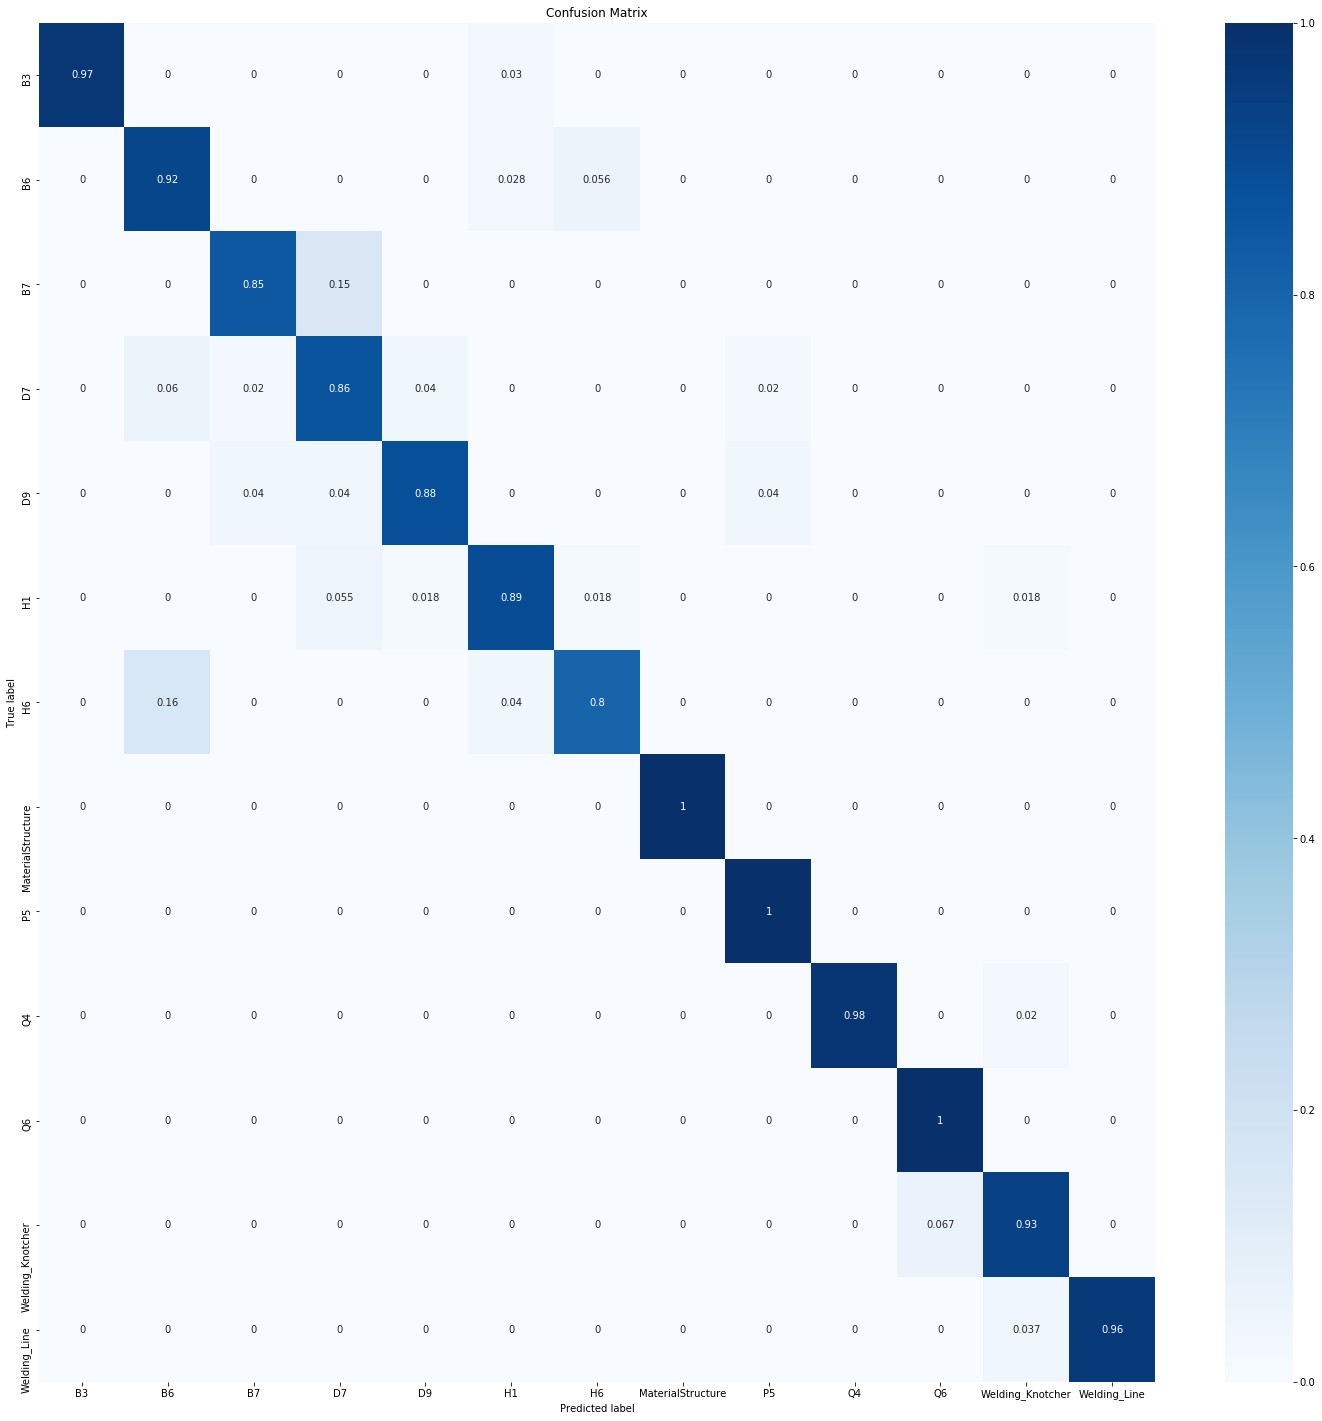

Classification Report: 
               precision    recall  f1-score   support

           0      1.000     0.970     0.985        33
           1      0.825     0.917     0.868        36
           2      0.846     0.846     0.846        13
           3      0.878     0.860     0.869        50
           4      0.880     0.880     0.880        25
           5      0.942     0.891     0.916        55
           6      0.870     0.800     0.833        25
           7      1.000     1.000     1.000        31
           8      0.943     1.000     0.971        33
           9      1.000     0.980     0.990        50
          10      0.983     1.000     0.991        58
          11      0.824     0.933     0.875        15
          12      1.000     0.963     0.981        27

    accuracy                          0.933       451
   macro avg      0.922     0.926     0.923       451
weighted avg      0.935     0.933     0.934       451

y_test: [(0, 33), (1, 36), (2, 13), (3, 50), (4, 25), 

In [27]:
net = get_loaded_model(models_fname, net_names[exp_id], classes, ctx=ctx)
create_confusion_matrix(net=net, ctx=ctx, val_data=val_data, labels=labels)
create_confusion_matrix(net=net, ctx=ctx, val_data=test_data, labels=labels)

# Exp. #33
## GA, dataset v3, resnet18_v1, GluonCV script

In [28]:
exp_id = 33

In [29]:
version = dict_exp[exp_id]['version']
camera_type = dict_exp[exp_id]['camera_type']

In [30]:
data_dir = data_dirs[version]
data_fdir = f'{root}/{data_dir}/{camera_type}'

In [31]:
classes = dict_classes[version][camera_type]
model_name = model_names[exp_id]
models_fname = f'{root}/{git_dir}/{model_dir}/{model_name}'

In [32]:
train_ds, valid_ds, test_ds = [
        gluon.data.vision.ImageFolderDataset(
            os.path.join(data_fdir, folder))
        for folder in ['train', 'val', 'test']
    ]
labels = train_ds.synsets
val_data = gluon.data.DataLoader(
    valid_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)
test_data = gluon.data.DataLoader(
    test_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)

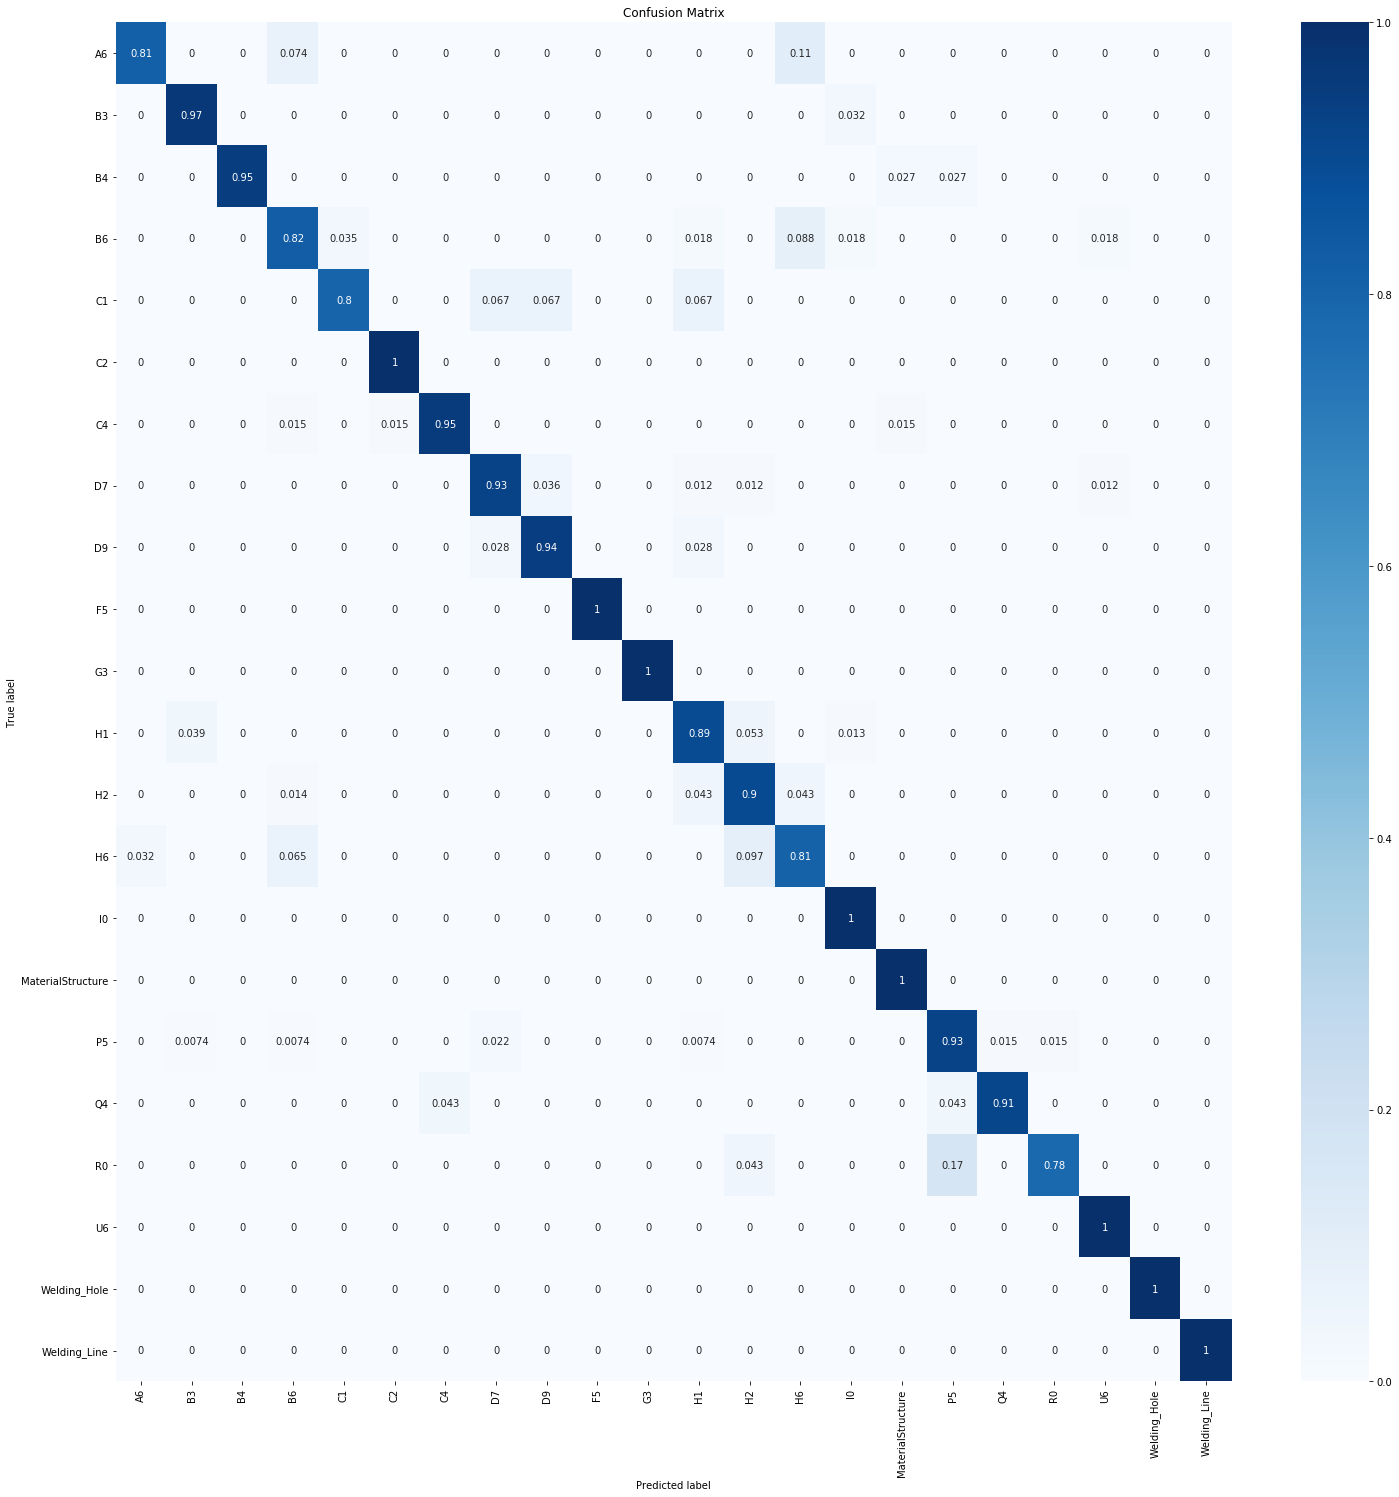

Classification Report: 
               precision    recall  f1-score   support

           0      0.957     0.815     0.880        27
           1      0.882     0.968     0.923        31
           2      1.000     0.946     0.972        37
           3      0.870     0.825     0.847        57
           4      0.857     0.800     0.828        15
           5      0.750     1.000     0.857         3
           6      0.969     0.954     0.961        65
           7      0.940     0.929     0.934        84
           8      0.895     0.944     0.919        36
           9      1.000     1.000     1.000        10
          10      1.000     1.000     1.000         4
          11      0.895     0.895     0.895        76
          12      0.873     0.899     0.886        69
          13      0.694     0.806     0.746        31
          14      0.571     1.000     0.727         4
          15      0.973     1.000     0.986        72
          16      0.947     0.926     0.937       136
  

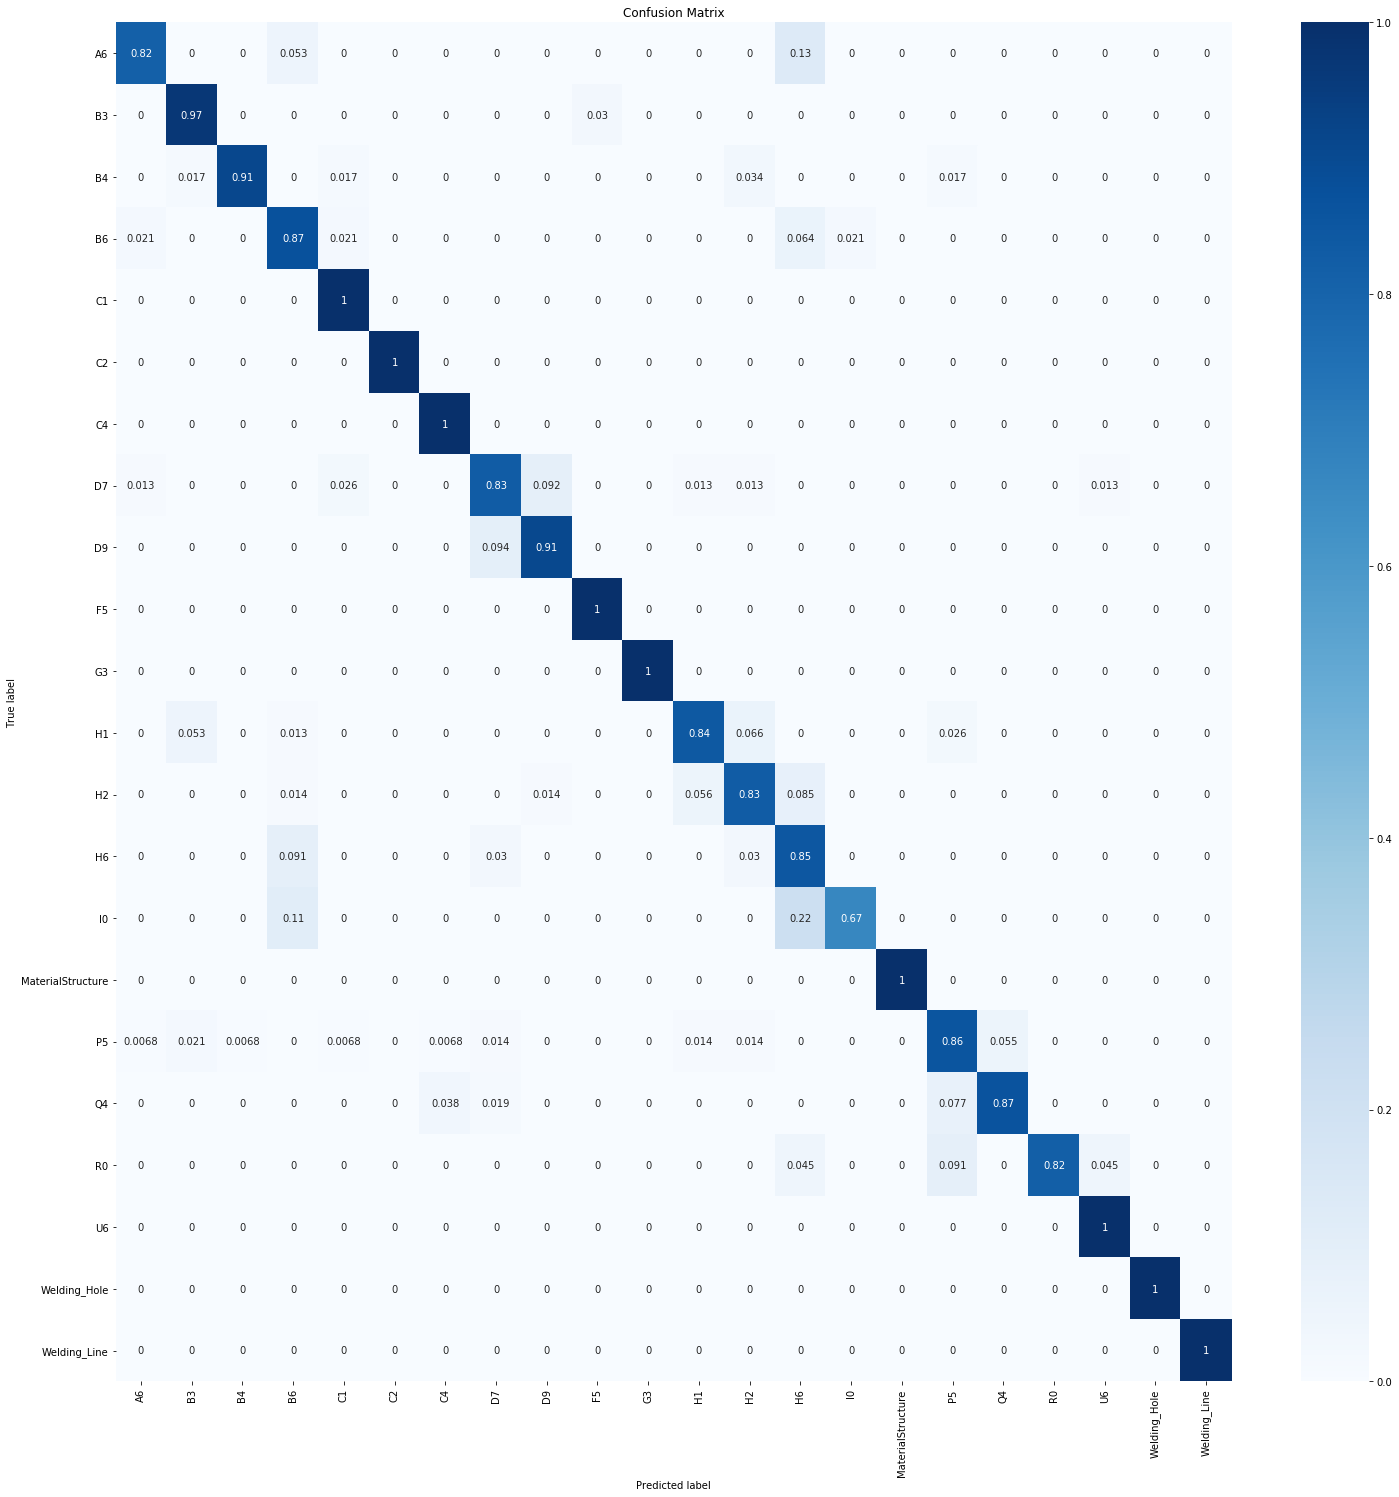

Classification Report: 
               precision    recall  f1-score   support

           0      0.912     0.816     0.861        38
           1      0.800     0.970     0.877        33
           2      0.981     0.914     0.946        58
           3      0.837     0.872     0.854        47
           4      0.688     1.000     0.815        11
           5      1.000     1.000     1.000         4
           6      0.948     1.000     0.973        55
           7      0.900     0.829     0.863        76
           8      0.784     0.906     0.841        32
           9      0.667     1.000     0.800         2
          10      1.000     1.000     1.000         2
          11      0.901     0.842     0.871        76
          12      0.843     0.831     0.837        71
          13      0.622     0.848     0.718        33
          14      0.857     0.667     0.750         9
          15      1.000     1.000     1.000        58
          16      0.933     0.856     0.893       146
  

In [33]:
net = get_loaded_model(models_fname, net_names[exp_id], classes, ctx=ctx)
create_confusion_matrix(net=net, ctx=ctx, val_data=val_data, labels=labels)
create_confusion_matrix(net=net, ctx=ctx, val_data=test_data, labels=labels)

# Exp. #34
## GI, dataset v3, resnet18_v1, GluonCV script

In [34]:
exp_id = 34

In [35]:
version = dict_exp[exp_id]['version']
camera_type = dict_exp[exp_id]['camera_type']

In [36]:
data_dir = data_dirs[version]
data_fdir = f'{root}/{data_dir}/{camera_type}'

In [37]:
classes = dict_classes[version][camera_type]
model_name = model_names[exp_id]
models_fname = f'{root}/{git_dir}/{model_dir}/{model_name}'

In [38]:
train_ds, valid_ds, test_ds = [
        gluon.data.vision.ImageFolderDataset(
            os.path.join(data_fdir, folder))
        for folder in ['train', 'val', 'test']
    ]
labels = train_ds.synsets
val_data = gluon.data.DataLoader(
    valid_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)
test_data = gluon.data.DataLoader(
    test_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:318: UserWarning: Ignoring /home/ec2-user/SageMaker/datasets-patches-balanced/GI/train/P5_4/.ipynb_checkpoints of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


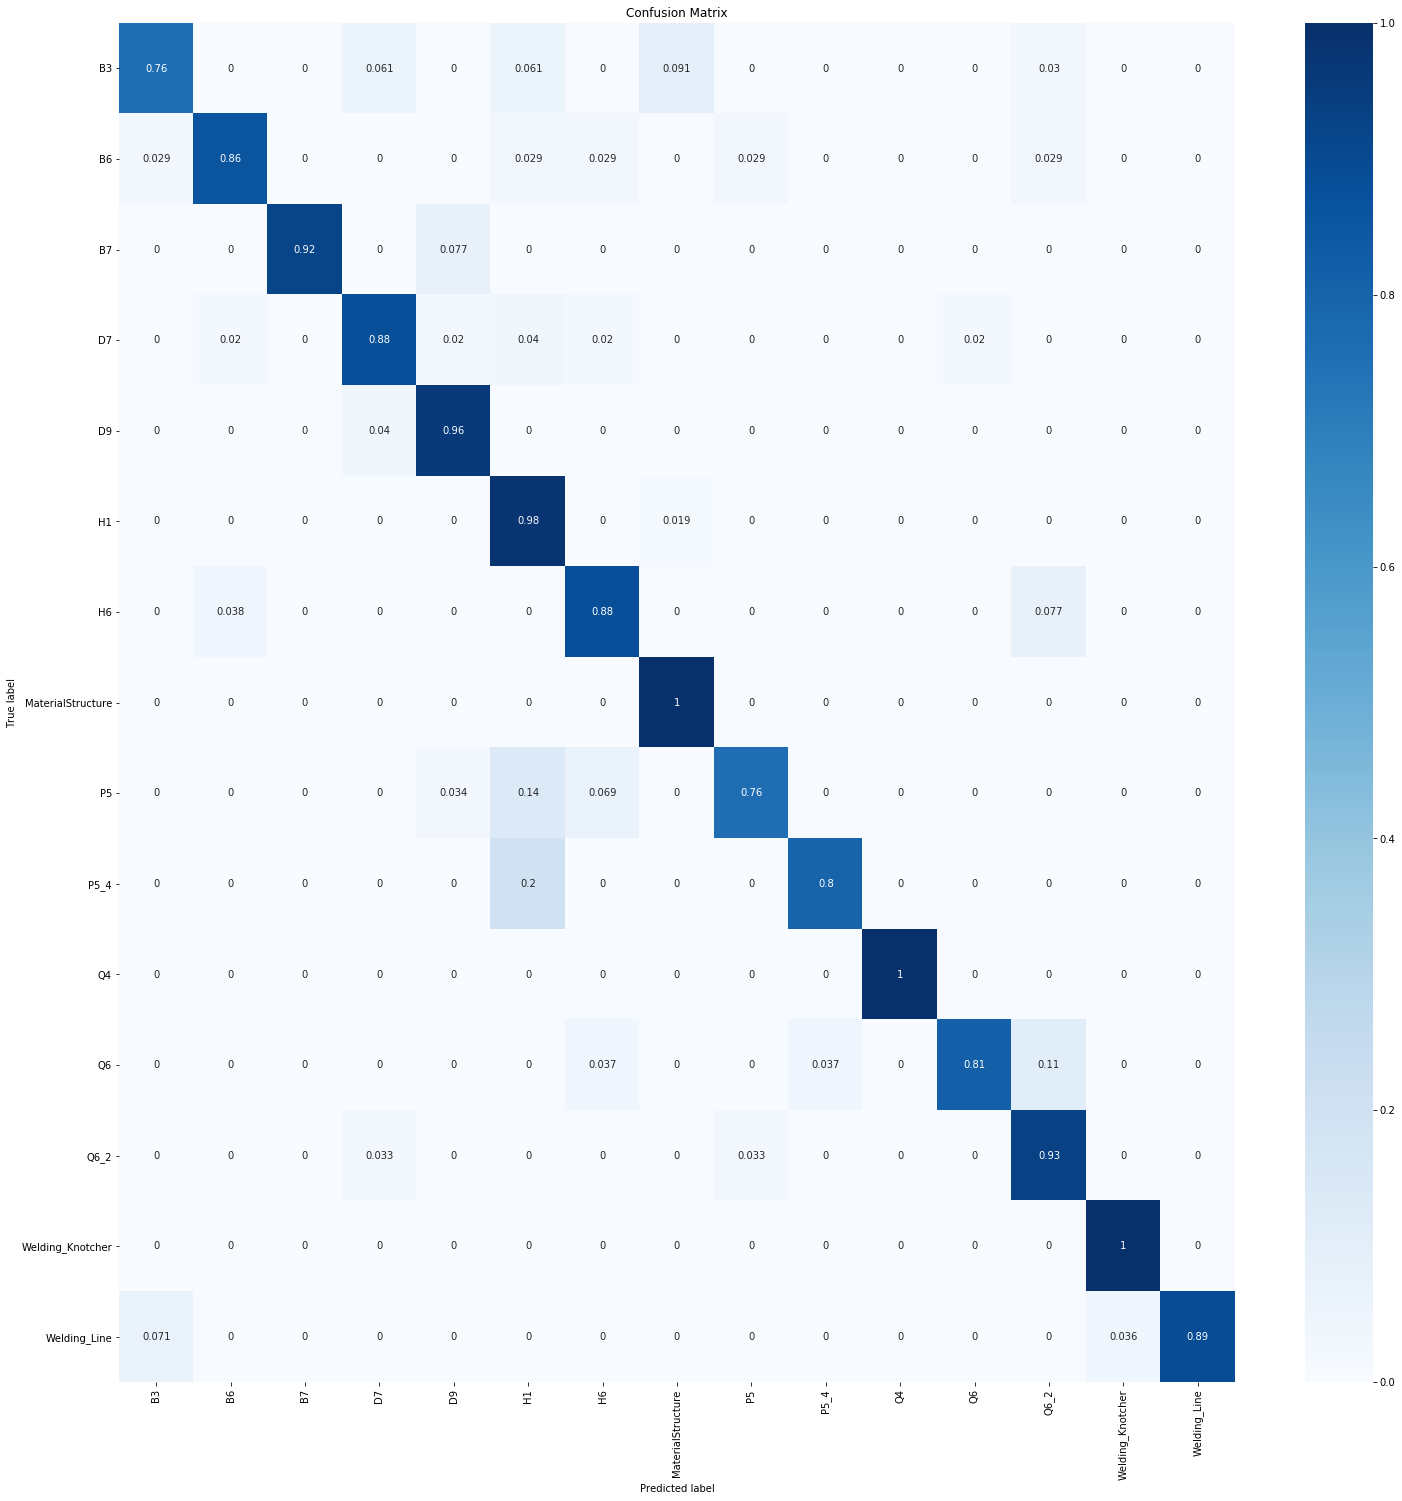

Classification Report: 
               precision    recall  f1-score   support

           0      0.893     0.758     0.820        33
           1      0.938     0.857     0.896        35
           2      1.000     0.923     0.960        13
           3      0.917     0.880     0.898        50
           4      0.889     0.960     0.923        25
           5      0.841     0.981     0.906        54
           6      0.821     0.885     0.852        26
           7      0.886     1.000     0.939        31
           8      0.917     0.759     0.830        29
           9      0.800     0.800     0.800         5
          10      1.000     1.000     1.000        49
          11      0.957     0.815     0.880        27
          12      0.800     0.933     0.862        30
          13      0.938     1.000     0.968        15
          14      1.000     0.893     0.943        28

    accuracy                          0.904       450
   macro avg      0.906     0.896     0.898       450
w

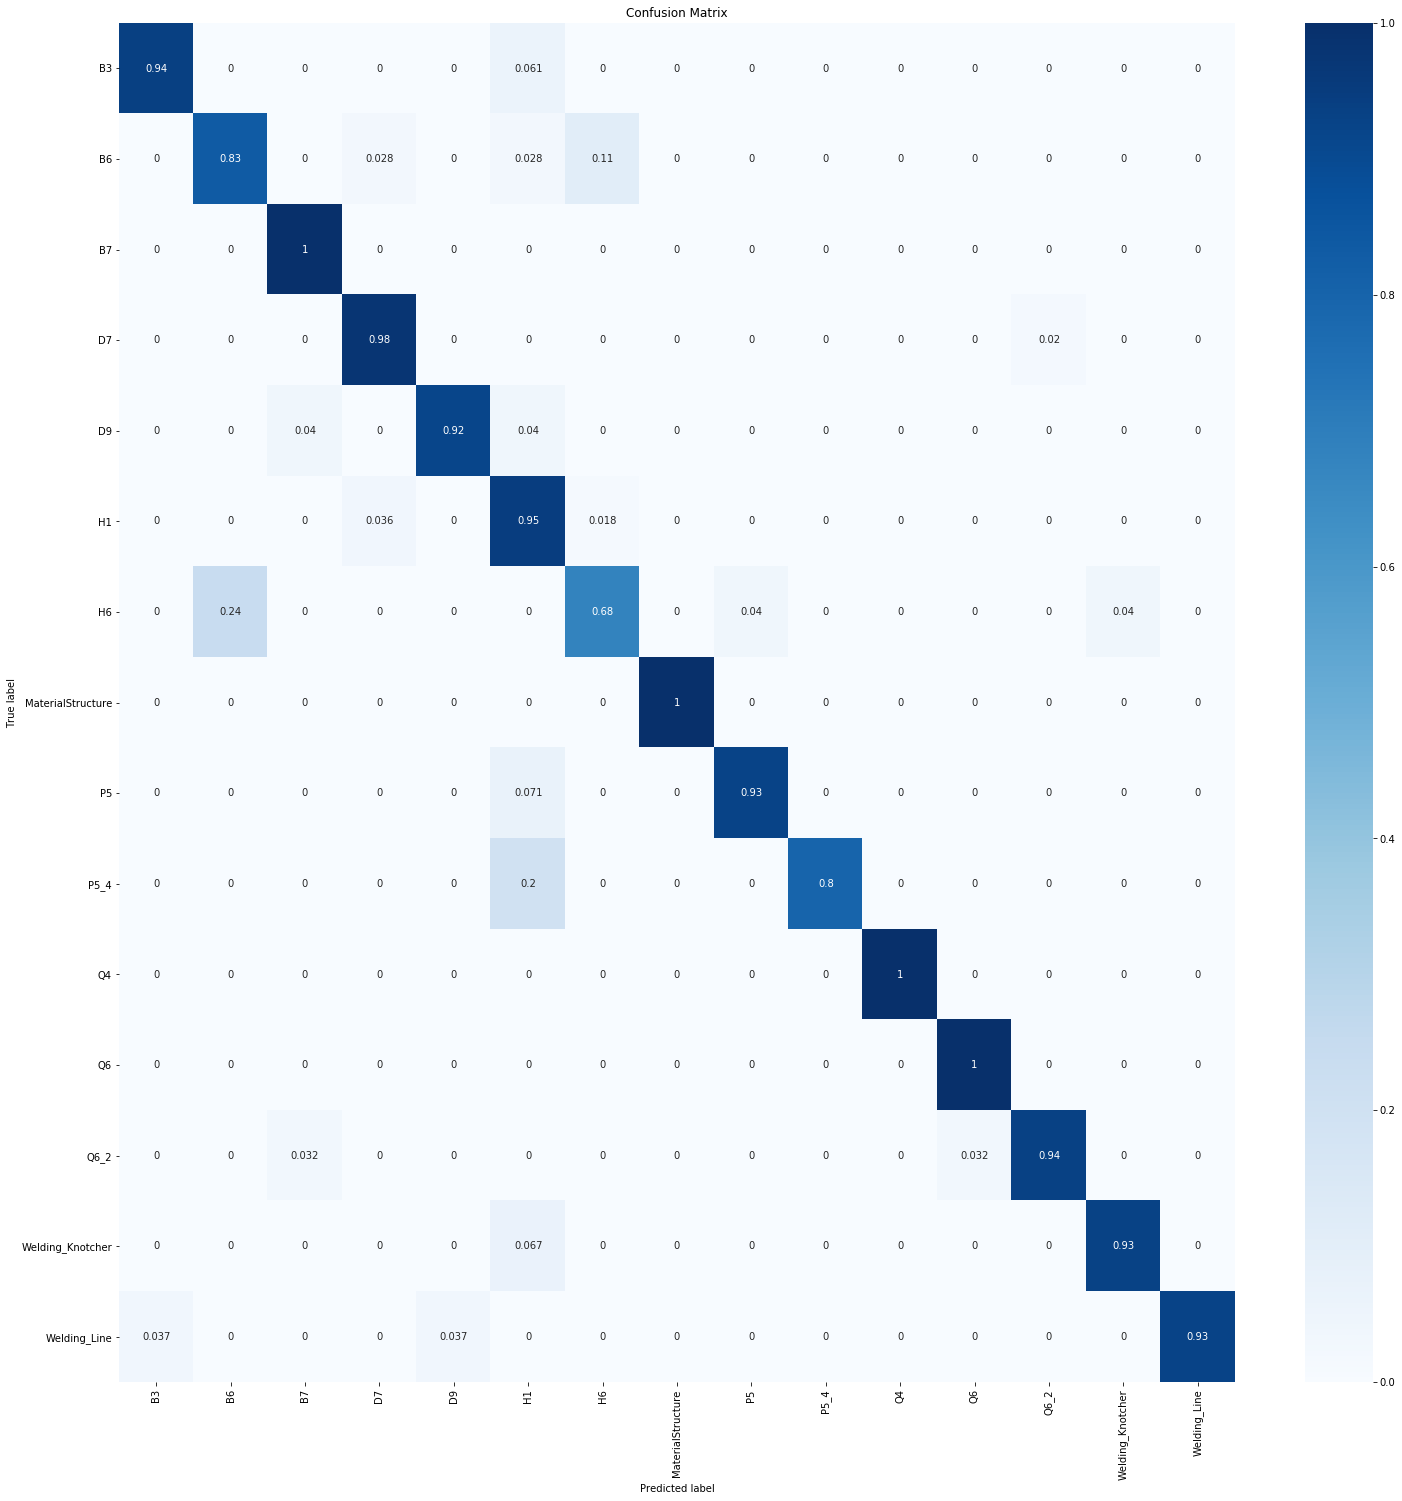

Classification Report: 
               precision    recall  f1-score   support

           0      0.969     0.939     0.954        33
           1      0.833     0.833     0.833        36
           2      0.867     1.000     0.929        13
           3      0.942     0.980     0.961        50
           4      0.958     0.920     0.939        25
           5      0.867     0.945     0.904        55
           6      0.773     0.680     0.723        25
           7      1.000     1.000     1.000        31
           8      0.963     0.929     0.945        28
           9      1.000     0.800     0.889         5
          10      1.000     1.000     1.000        50
          11      0.964     1.000     0.982        27
          12      0.967     0.935     0.951        31
          13      0.933     0.933     0.933        15
          14      1.000     0.926     0.962        27

    accuracy                          0.933       451
   macro avg      0.936     0.921     0.927       451
w

In [39]:
net = get_loaded_model(models_fname, net_names[exp_id], classes, ctx=ctx)
create_confusion_matrix(net=net, ctx=ctx, val_data=val_data, labels=labels)
create_confusion_matrix(net=net, ctx=ctx, val_data=test_data, labels=labels)

# Exp. #35
## GA, dataset v3, resnet18_v1, GluonCV script

In [40]:
exp_id = 35

In [41]:
version = dict_exp[exp_id]['version']
camera_type = dict_exp[exp_id]['camera_type']

In [42]:
data_dir = data_dirs[version]
data_fdir = f'{root}/{data_dir}/{camera_type}'

In [43]:
classes = dict_classes[version][camera_type]
model_name = model_names[exp_id]
models_fname = f'{root}/{git_dir}/{model_dir}/{model_name}'

In [44]:
train_ds, valid_ds, test_ds = [
        gluon.data.vision.ImageFolderDataset(
            os.path.join(data_fdir, folder))
        for folder in ['train', 'val', 'test']
    ]
labels = train_ds.synsets
val_data = gluon.data.DataLoader(
    valid_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)
test_data = gluon.data.DataLoader(
    test_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:318: UserWarning: Ignoring /home/ec2-user/SageMaker/datasets-patches-balanced/GA/train/B4_2/.ipynb_checkpoints of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


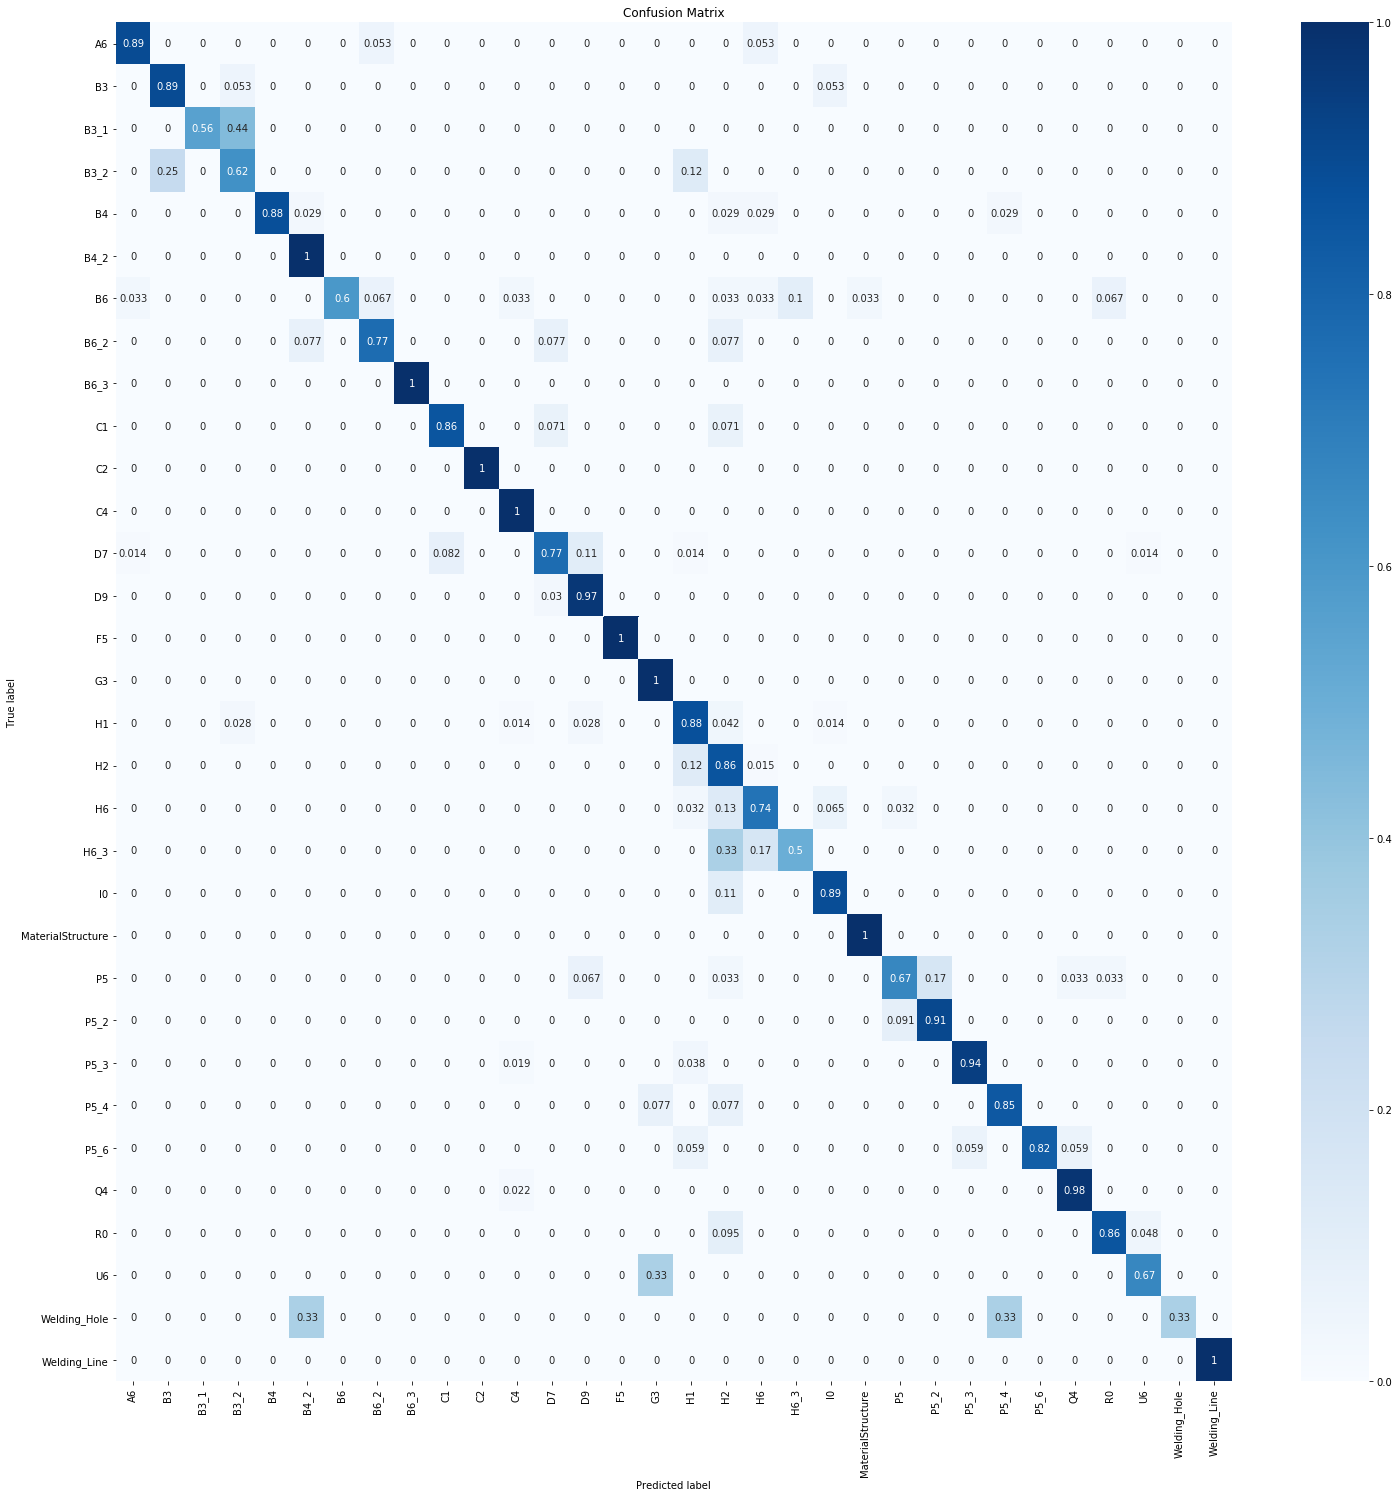

Classification Report: 
               precision    recall  f1-score   support

           0      0.944     0.895     0.919        38
           1      0.895     0.895     0.895        19
           2      1.000     0.556     0.714         9
           3      0.417     0.625     0.500         8
           4      1.000     0.882     0.938        34
           5      0.850     1.000     0.919        17
           6      1.000     0.600     0.750        30
           7      0.714     0.769     0.741        13
           8      1.000     1.000     1.000        16
           9      0.667     0.857     0.750        14
          10      1.000     1.000     1.000         4
          11      0.940     1.000     0.969        63
          12      0.949     0.767     0.848        73
          13      0.727     0.970     0.831        33
          14      1.000     1.000     1.000         4
          15      0.500     1.000     0.667         2
          16      0.818     0.875     0.846        72
  

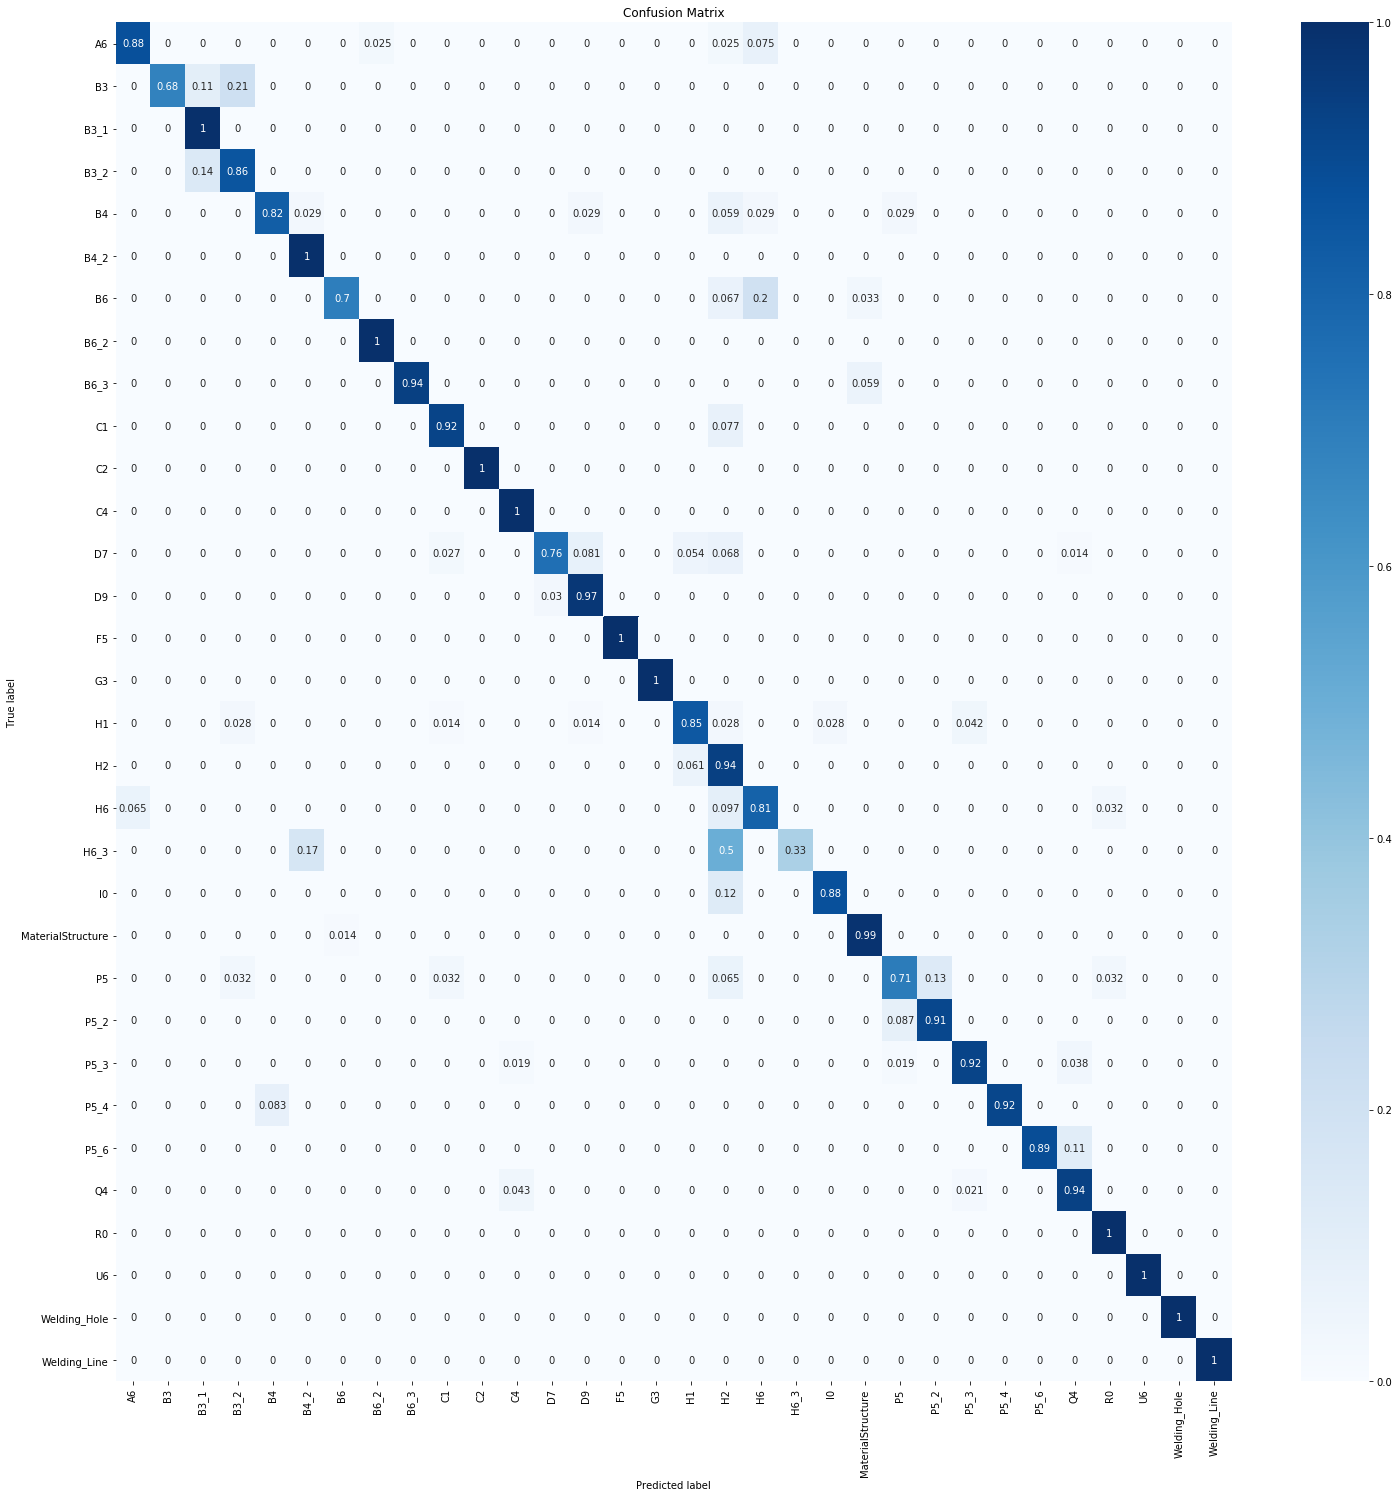

Classification Report: 
               precision    recall  f1-score   support

           0      0.946     0.875     0.909        40
           1      1.000     0.684     0.813        19
           2      0.727     1.000     0.842         8
           3      0.462     0.857     0.600         7
           4      0.966     0.824     0.889        34
           5      0.895     1.000     0.944        17
           6      0.955     0.700     0.808        30
           7      0.929     1.000     0.963        13
           8      1.000     0.941     0.970        17
           9      0.750     0.923     0.828        13
          10      1.000     1.000     1.000         3
          11      0.955     1.000     0.977        63
          12      0.982     0.757     0.855        74
          13      0.800     0.970     0.877        33
          14      1.000     1.000     1.000         3
          15      1.000     1.000     1.000         2
          16      0.884     0.847     0.865        72
  

In [45]:
net = get_loaded_model(models_fname, net_names[exp_id], classes, ctx=ctx)
create_confusion_matrix(net=net, ctx=ctx, val_data=val_data, labels=labels)
create_confusion_matrix(net=net, ctx=ctx, val_data=test_data, labels=labels)

# Exp. #36
## GI, dataset v3, resnet18_v1, GluonCV script

In [46]:
exp_id = 36

In [47]:
version = dict_exp[exp_id]['version']
camera_type = dict_exp[exp_id]['camera_type']

In [48]:
data_dir = data_dirs[version]
data_fdir = f'{root}/{data_dir}/{camera_type}'

In [49]:
classes = dict_classes[version][camera_type]
model_name = model_names[exp_id]
models_fname = f'{root}/{git_dir}/{model_dir}/{model_name}'

In [50]:
train_ds, valid_ds, test_ds = [
        gluon.data.vision.ImageFolderDataset(
            os.path.join(data_fdir, folder))
        for folder in ['train', 'val', 'test']
    ]
labels = train_ds.synsets
val_data = gluon.data.DataLoader(
    valid_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)
test_data = gluon.data.DataLoader(
    test_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)

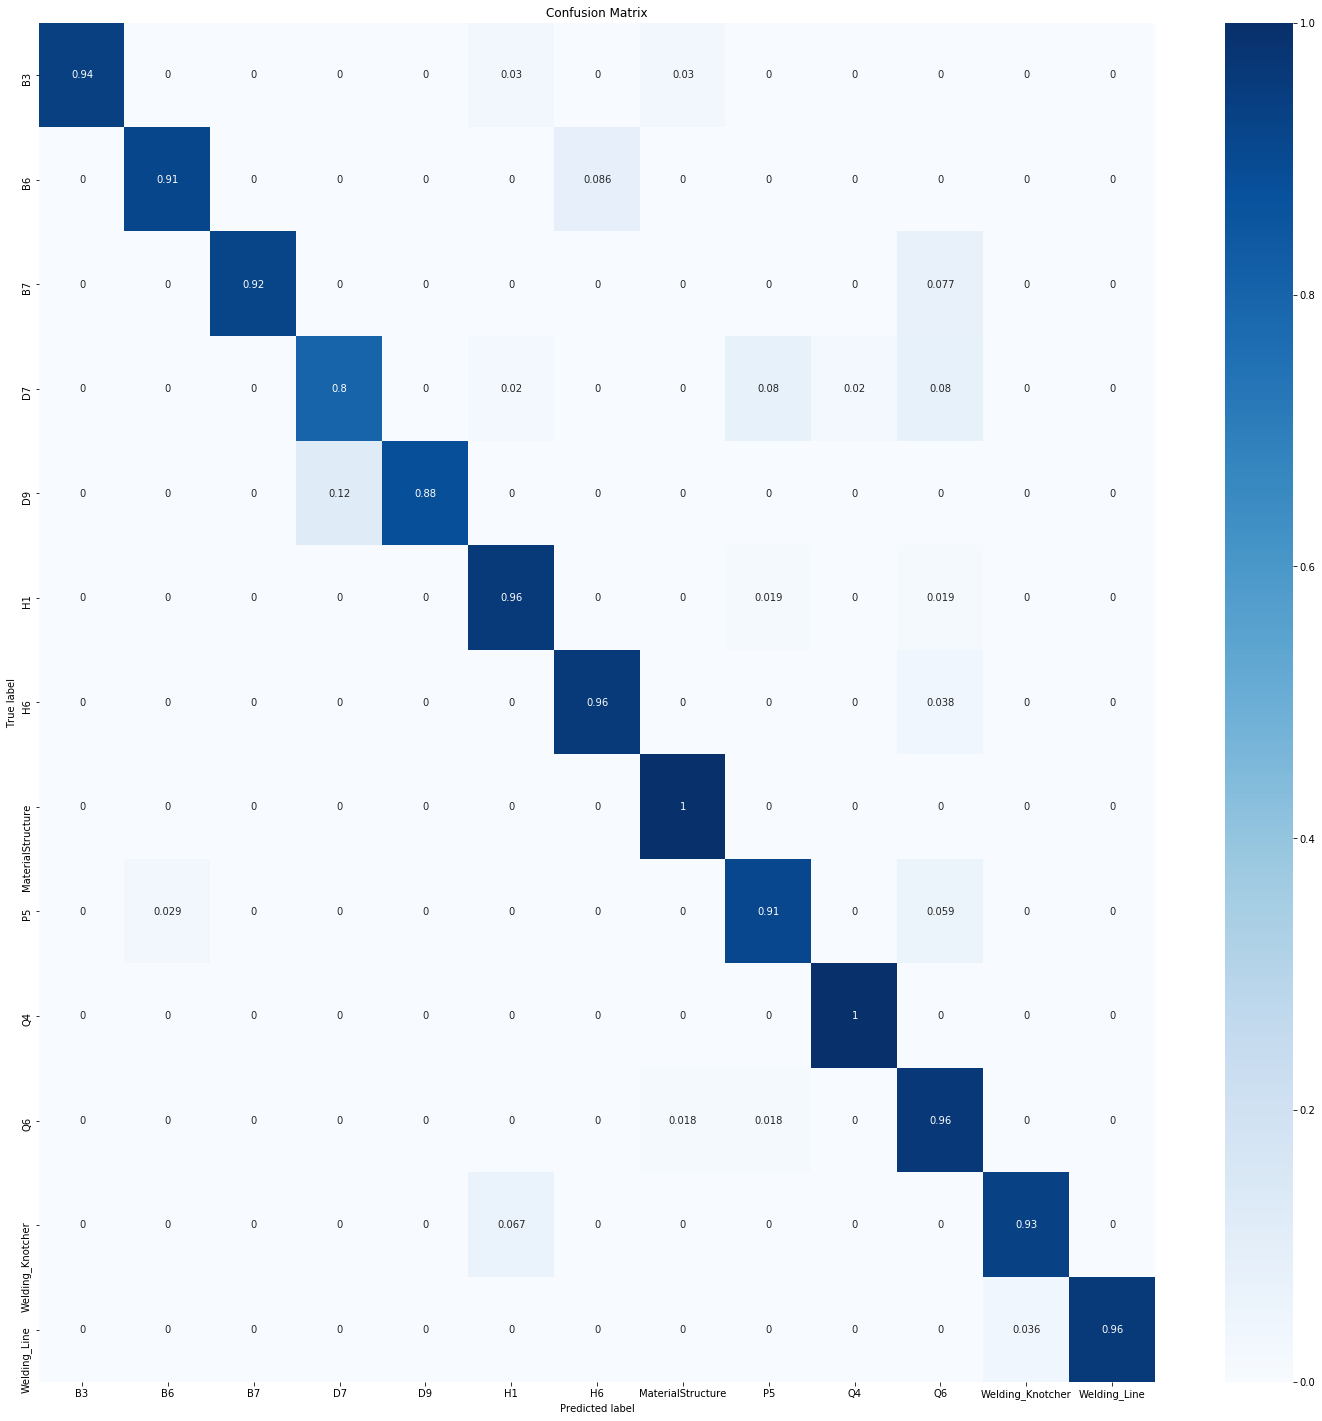

Classification Report: 
               precision    recall  f1-score   support

           0      1.000     0.939     0.969        33
           1      0.970     0.914     0.941        35
           2      1.000     0.923     0.960        13
           3      0.930     0.800     0.860        50
           4      1.000     0.880     0.936        25
           5      0.945     0.963     0.954        54
           6      0.893     0.962     0.926        26
           7      0.939     1.000     0.969        31
           8      0.838     0.912     0.873        34
           9      0.980     1.000     0.990        49
          10      0.859     0.965     0.909        57
          11      0.933     0.933     0.933        15
          12      1.000     0.964     0.982        28

    accuracy                          0.936       450
   macro avg      0.945     0.935     0.939       450
weighted avg      0.939     0.936     0.935       450

y_test: [(0, 33), (1, 35), (2, 13), (3, 50), (4, 25), 

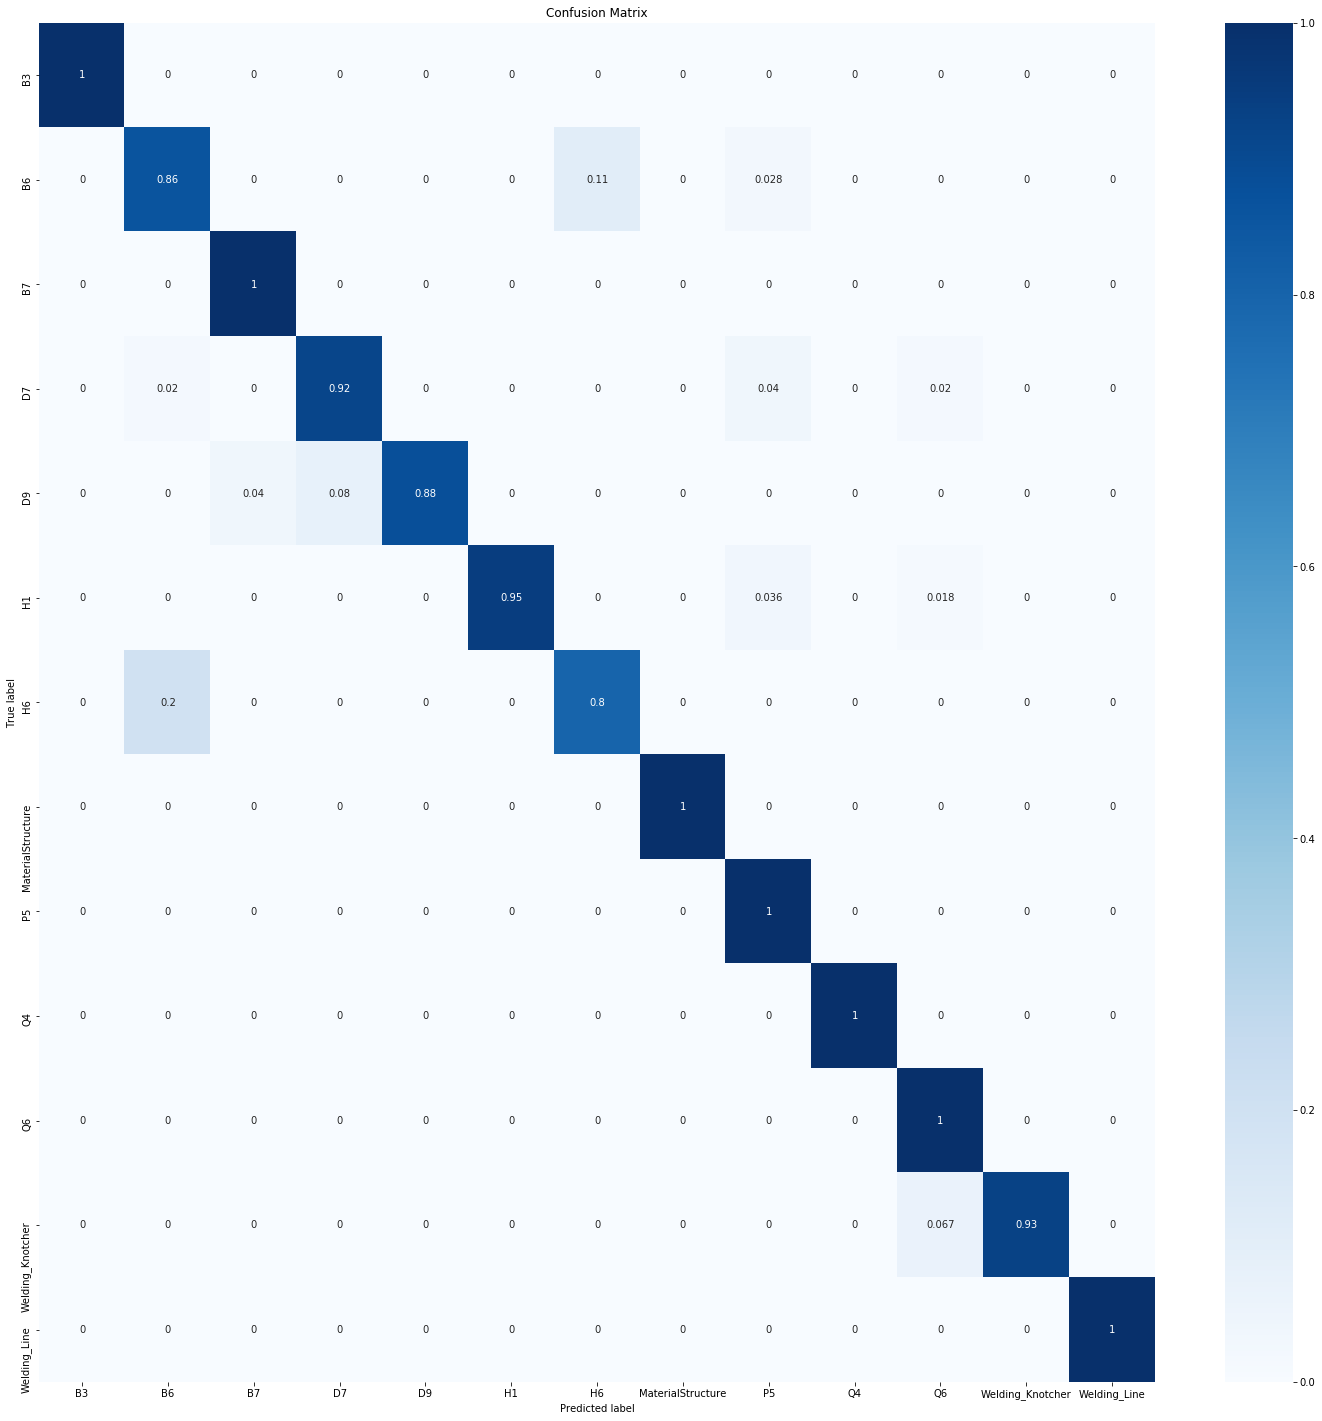

Classification Report: 
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        33
           1      0.838     0.861     0.849        36
           2      0.929     1.000     0.963        13
           3      0.958     0.920     0.939        50
           4      1.000     0.880     0.936        25
           5      1.000     0.945     0.972        55
           6      0.833     0.800     0.816        25
           7      1.000     1.000     1.000        31
           8      0.868     1.000     0.930        33
           9      1.000     1.000     1.000        50
          10      0.951     1.000     0.975        58
          11      1.000     0.933     0.966        15
          12      1.000     1.000     1.000        27

    accuracy                          0.953       451
   macro avg      0.952     0.949     0.950       451
weighted avg      0.955     0.953     0.953       451

y_test: [(0, 33), (1, 36), (2, 13), (3, 50), (4, 25), 

In [51]:
net = get_loaded_model(models_fname, net_names[exp_id], classes, ctx=ctx)
create_confusion_matrix(net=net, ctx=ctx, val_data=val_data, labels=labels)
create_confusion_matrix(net=net, ctx=ctx, val_data=test_data, labels=labels)

# Exp. #37
## GA, dataset v3, resnet18_v1, GluonCV script

In [52]:
exp_id = 37

In [53]:
version = dict_exp[exp_id]['version']
camera_type = dict_exp[exp_id]['camera_type']

In [54]:
data_dir = data_dirs[version]
data_fdir = f'{root}/{data_dir}/{camera_type}'

In [55]:
classes = dict_classes[version][camera_type]
model_name = model_names[exp_id]
models_fname = f'{root}/{git_dir}/{model_dir}/{model_name}'

In [56]:
train_ds, valid_ds, test_ds = [
        gluon.data.vision.ImageFolderDataset(
            os.path.join(data_fdir, folder))
        for folder in ['train', 'val', 'test']
    ]
labels = train_ds.synsets
val_data = gluon.data.DataLoader(
    valid_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)
test_data = gluon.data.DataLoader(
    test_ds.transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)

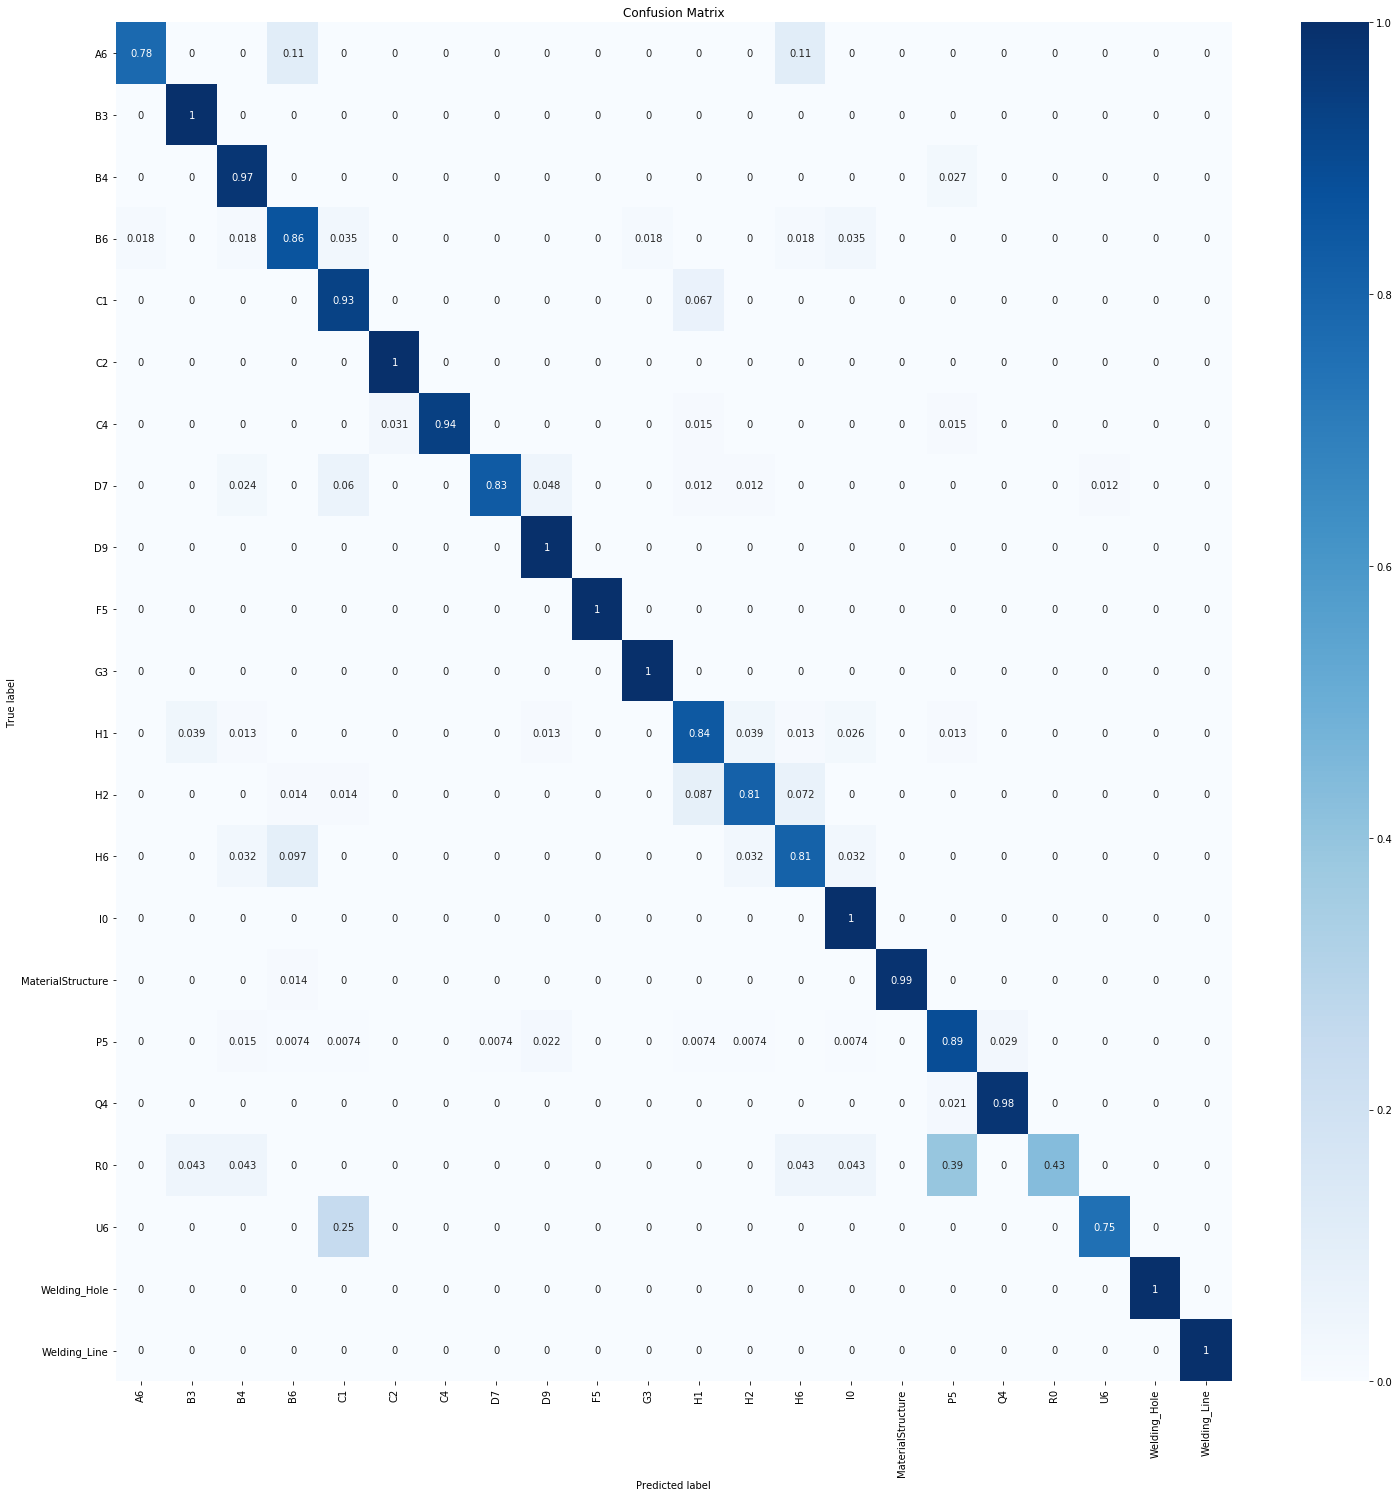

Classification Report: 
               precision    recall  f1-score   support

           0      0.955     0.778     0.857        27
           1      0.886     1.000     0.939        31
           2      0.818     0.973     0.889        37
           3      0.845     0.860     0.852        57
           4      0.583     0.933     0.718        15
           5      0.600     1.000     0.750         3
           6      1.000     0.938     0.968        65
           7      0.986     0.833     0.903        84
           8      0.818     1.000     0.900        36
           9      1.000     1.000     1.000        10
          10      0.800     1.000     0.889         4
          11      0.865     0.842     0.853        76
          12      0.903     0.812     0.855        69
          13      0.694     0.806     0.746        31
          14      0.364     1.000     0.533         4
          15      1.000     0.986     0.993        72
          16      0.903     0.890     0.896       136
  

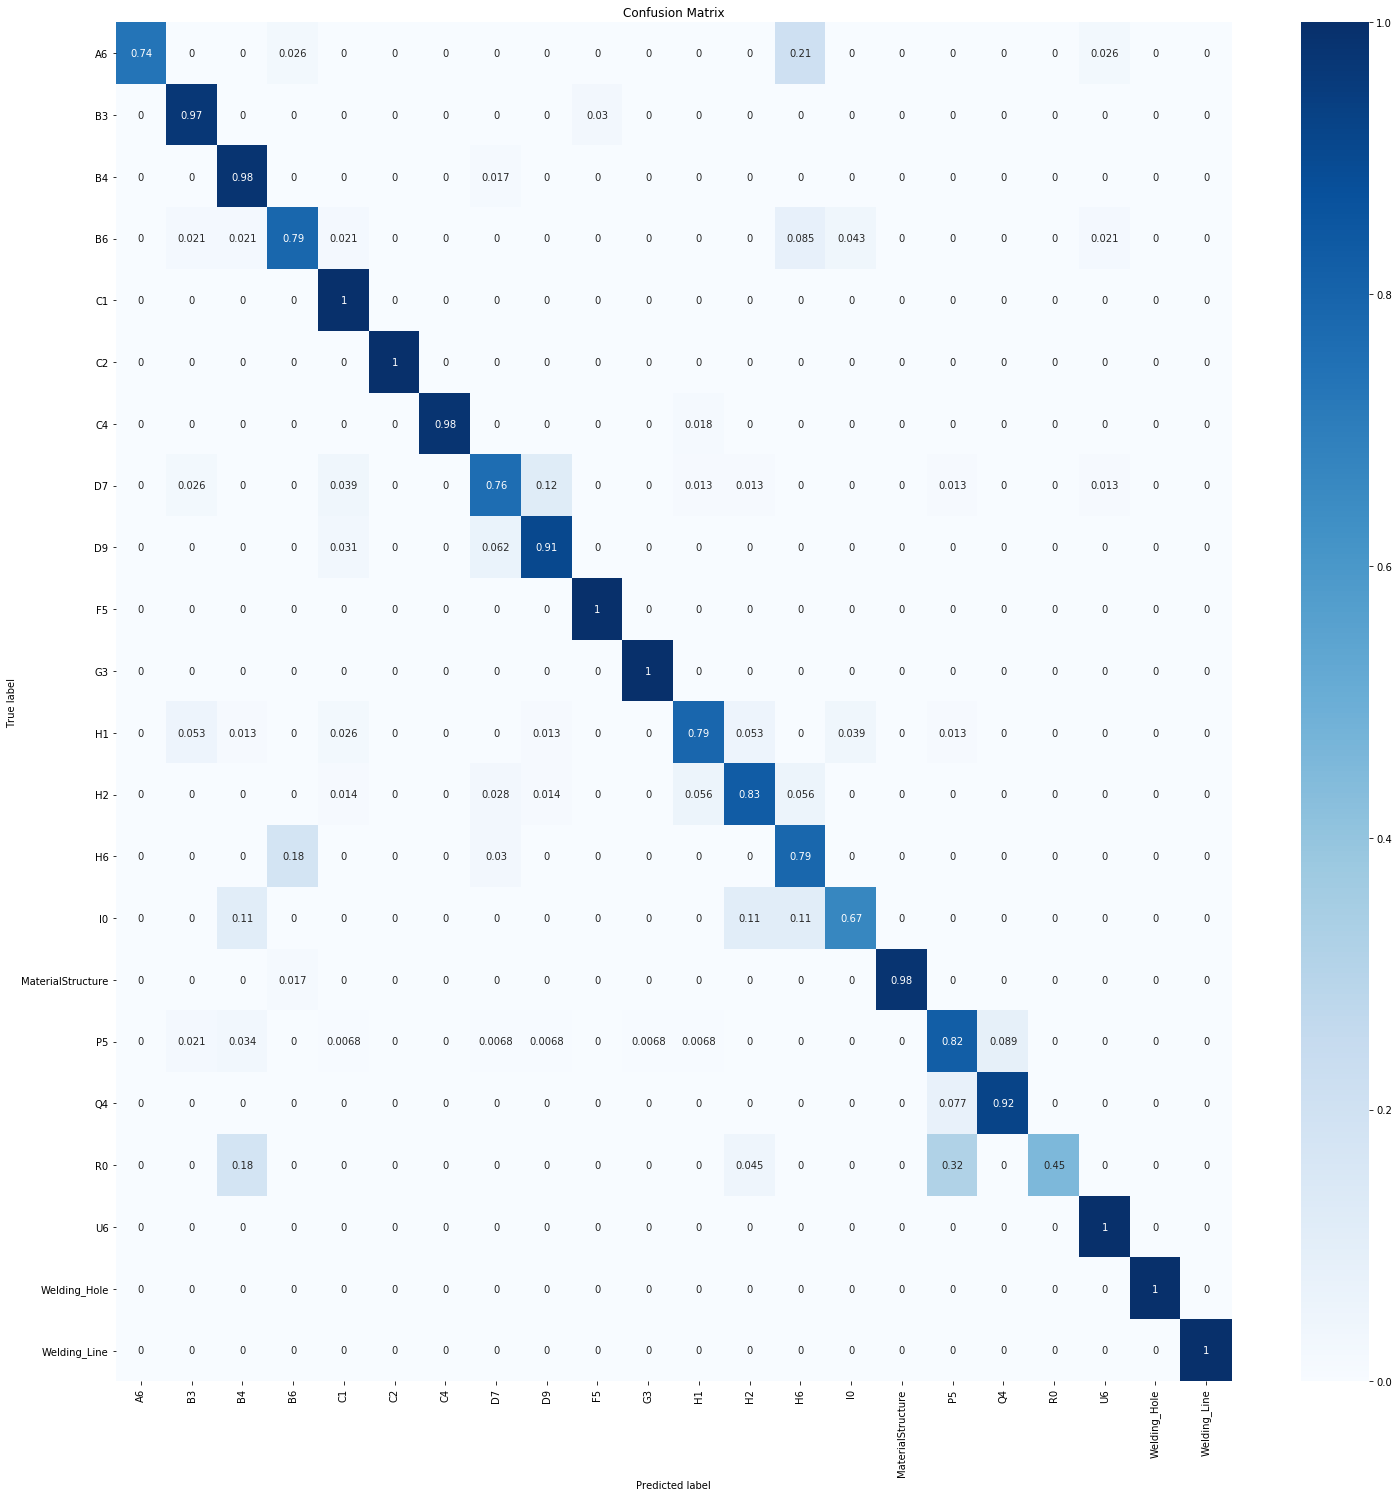

Classification Report: 
               precision    recall  f1-score   support

           0      1.000     0.737     0.848        38
           1      0.762     0.970     0.853        33
           2      0.826     0.983     0.898        58
           3      0.822     0.787     0.804        47
           4      0.550     1.000     0.710        11
           5      1.000     1.000     1.000         4
           6      1.000     0.982     0.991        55
           7      0.892     0.763     0.823        76
           8      0.707     0.906     0.795        32
           9      0.667     1.000     0.800         2
          10      0.667     1.000     0.800         2
          11      0.896     0.789     0.839        76
          12      0.894     0.831     0.861        71
          13      0.605     0.788     0.684        33
          14      0.545     0.667     0.600         9
          15      1.000     0.983     0.991        58
          16      0.902     0.822     0.860       146
  

In [57]:
net = get_loaded_model(models_fname, net_names[exp_id], classes, ctx=ctx)
create_confusion_matrix(net=net, ctx=ctx, val_data=val_data, labels=labels)
create_confusion_matrix(net=net, ctx=ctx, val_data=test_data, labels=labels)